## 1. Препроцессинг данных

### 1.1. Загрузим данные и бегло просмотрим

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('test_cluster.csv',sep=';',encoding='cp1252')

In [3]:
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [4]:
df.shape

(50000, 28)

In [5]:
df.columns

Index(['age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'cl_balance_0m',
       'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'dc_trx_cnt',
       'dc_trx_sum', 'income', 'min_casa_balance_1q', 'max_casa_balance_1q',
       'avg_casa_balance_1Y', 'min_td_balance_1q', 'max_td_balance_1q',
       'avg_td_balance_1Y', 'min_loan_balance_1q', 'max_loan_balance_1q',
       'avg_loan_balance_1Y', 'min_cl_balance_1q', 'max_cl_balance_1q',
       'avg_cl_balance_1Y', 'loan_to_deposit', 'Avg_trx', 'avgtrx_to_balance',
       'nbi'],
      dtype='object')

### 1.1.1. В соответствии с заданием необходимо кластеризовать данные по "поведению и/или продуктовому наполнению". У нас нет данных по изменению пола, миграции клиентов; возраст не управляется поведением. Поэтому убираем эти данные из выборки

In [6]:
df=df.drop(['age','gender','city_type'],axis=1)

### 1.1.2. Посмотрим на поле income

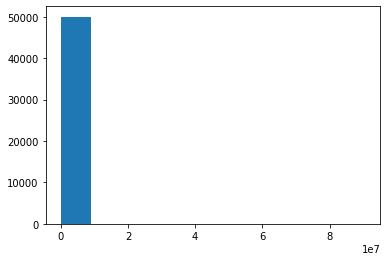

In [7]:
plt.hist(df.income)
plt.show()

In [8]:
df.loc[df.income>0].shape[0]

23219

### 1.2. В данных есть пропуски, посмотрим, в каких столбцах

In [9]:
df.isna().sum()

full_mob                   0
ml_balance                 0
cl_balance_0m              0
loan_balance_0m            0
td_balance_0m              0
casa_balance_0m            0
dc_trx_cnt                 0
dc_trx_sum                 0
income                     0
min_casa_balance_1q        0
max_casa_balance_1q        0
avg_casa_balance_1Y        0
min_td_balance_1q          0
max_td_balance_1q          0
avg_td_balance_1Y          0
min_loan_balance_1q        0
max_loan_balance_1q        0
avg_loan_balance_1Y        0
min_cl_balance_1q          0
max_cl_balance_1q          0
avg_cl_balance_1Y          0
loan_to_deposit        46180
Avg_trx                17872
avgtrx_to_balance      18485
nbi                     2431
dtype: int64

### 1.2.1. Поле loan_to_deposit не описано, но по названию очень похоже на отношение долга к депозиту. Проверим это разностью между гипотезой и непустыми значениями

In [10]:
df.avg_td_balance_1Y.min()

0.0

In [11]:
df['pred_loan_to_deposit']=df.avg_loan_balance_1Y/(df.avg_td_balance_1Y+1e-9)

In [12]:
(df.loc[df.loan_to_deposit.notnull()].loan_to_deposit-df.loc[df.loan_to_deposit.notnull()].pred_loan_to_deposit).sum()

6.235834440583088e-07

### 1.2.2. Поле Avg_trx (средний размер транзакции) наверное должно быть равно делению dc_trx_sum (сумма транзакций) на dc_trx_cnt (количество транзакций). Проверим

In [13]:
df.dc_trx_cnt.min()

0

In [14]:
df['pred_Avg_trx']=df.dc_trx_sum/(df.dc_trx_cnt+1e-9)

In [15]:
(df.loc[df.Avg_trx.notnull()].Avg_trx-df.loc[df.Avg_trx.notnull()].pred_Avg_trx).sum()

0.03526451763957458

### 1.2.3. Поле avgtrx_to_balance наверное должно быть равно делению Avg_trx (средний размер транзакции) на avg_casa_balance_1Y (средний баланс). Проверим

In [16]:
df.avg_casa_balance_1Y.min()

0.0

In [17]:
df['pred_avgtrx_to_balance']=df.Avg_trx/(df.avg_casa_balance_1Y+1e-9)

In [18]:
(df.loc[df.avgtrx_to_balance.notnull()].avgtrx_to_balance-df.loc[df.avgtrx_to_balance.notnull()].pred_avgtrx_to_balance).sum()

0.9185088618634649

### 1.2.4. Поле nbi (net banking income IMHO) даже без OPEX (operational expenditure IMHO) являются скорее следствием "поведения и/или продуктового наполнения" нежели характеристикой клиента. Поэтому я считаю, его можно выделить в отдельный датафрейм на будущее. Также дропнем поля из пунктов 1.2.1, 1.2.2 и 1.2.3

In [19]:
df_nbi=df.nbi
df=df.drop(['nbi','avgtrx_to_balance','pred_avgtrx_to_balance','Avg_trx','pred_Avg_trx','loan_to_deposit','pred_loan_to_deposit'],axis=1)

### 1.3. Посмотрим на попарные корреляции данных

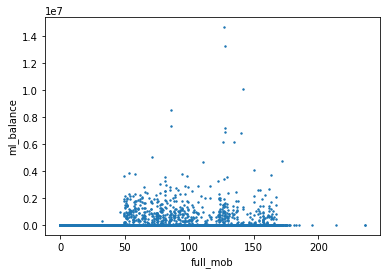

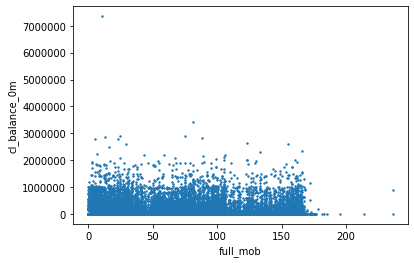

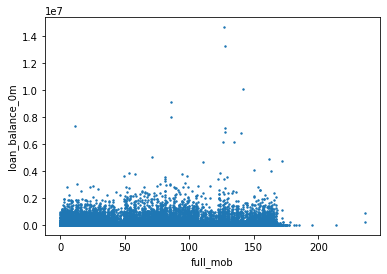

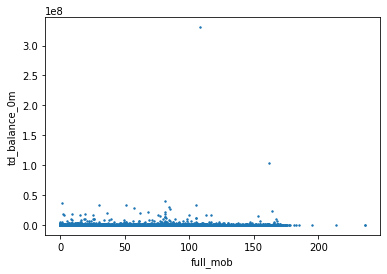

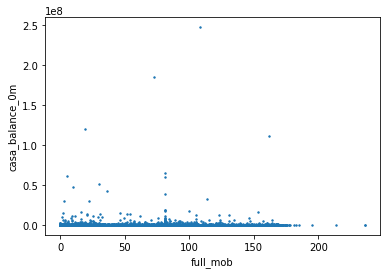

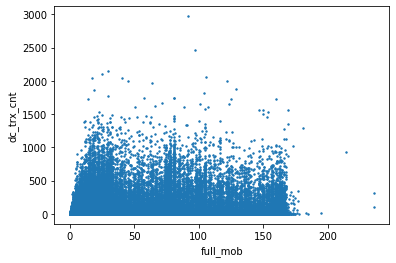

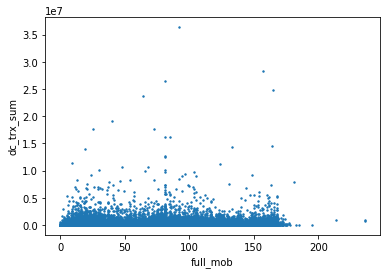

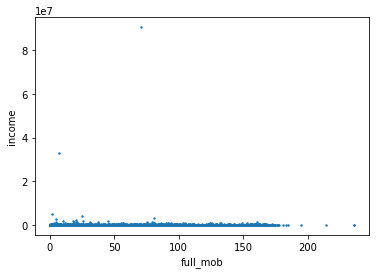

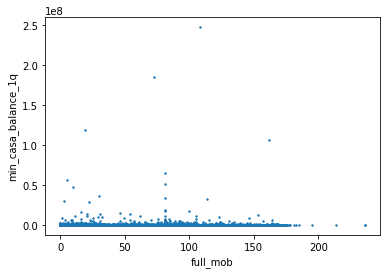

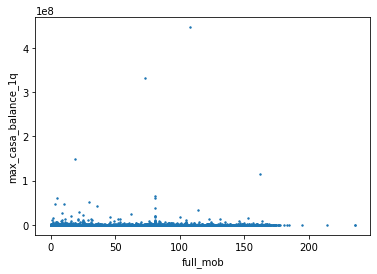

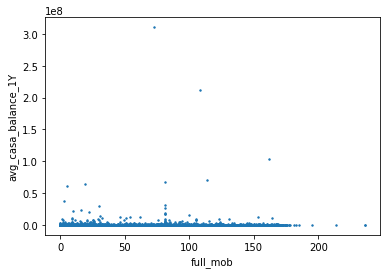

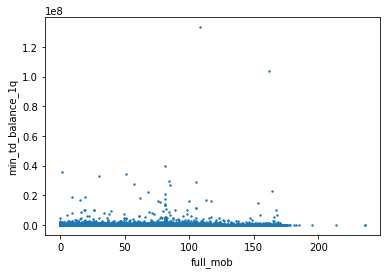

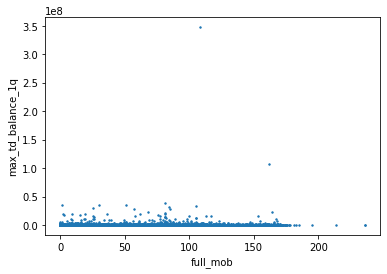

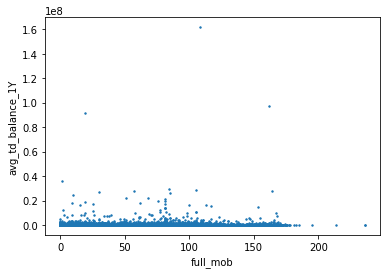

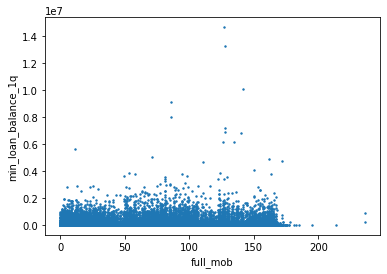

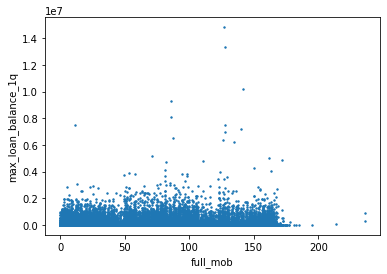

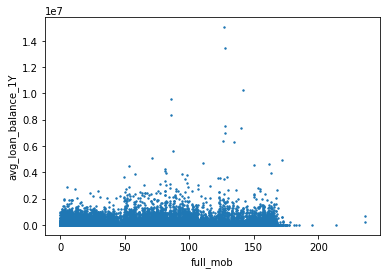

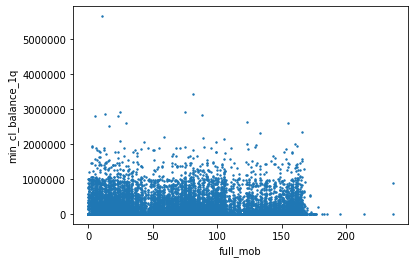

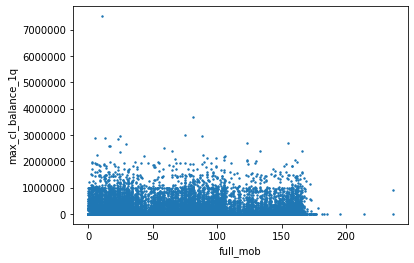

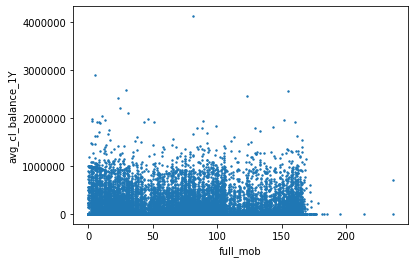

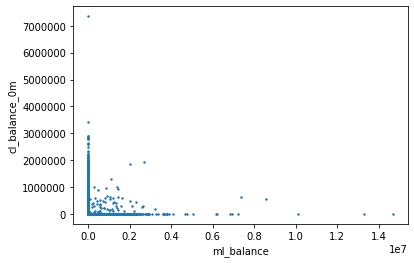

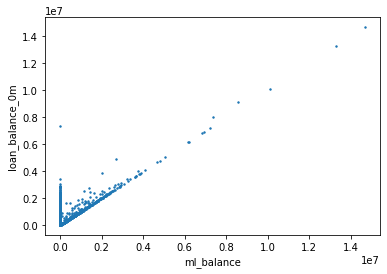

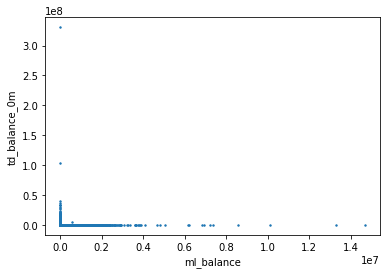

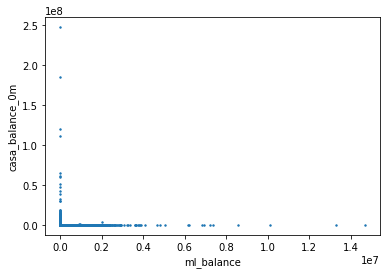

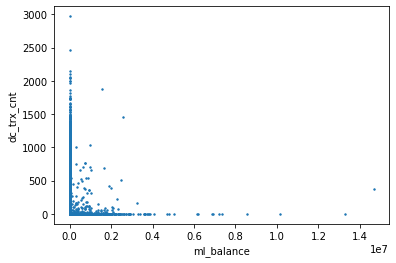

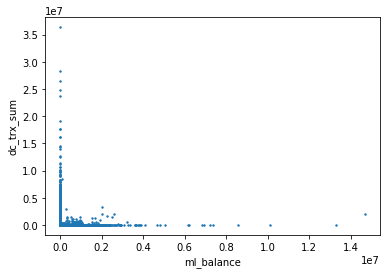

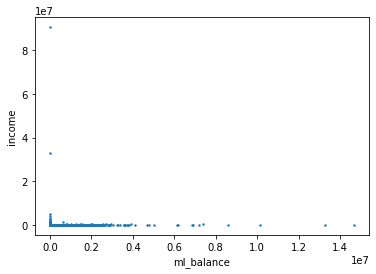

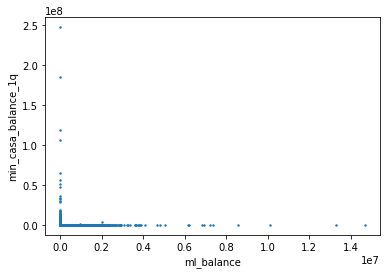

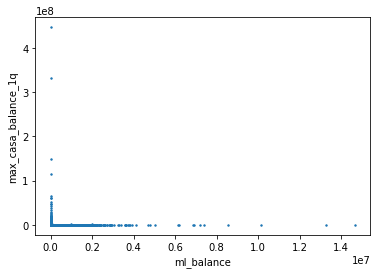

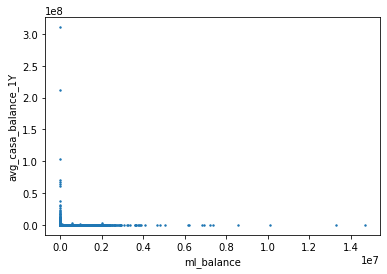

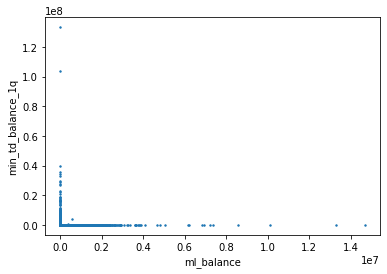

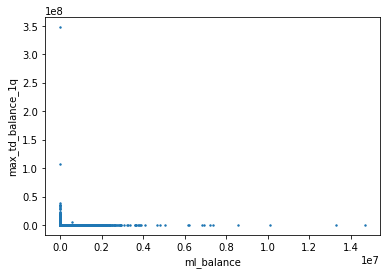

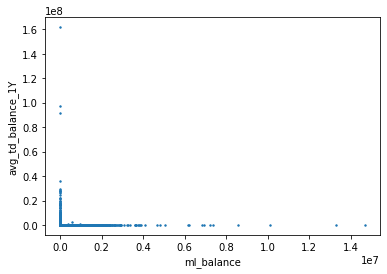

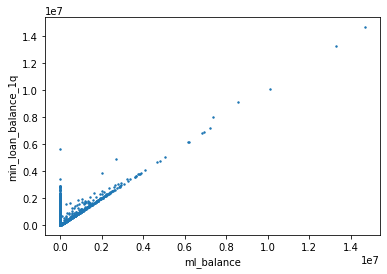

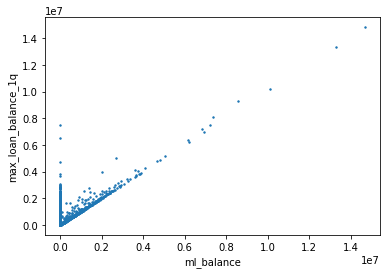

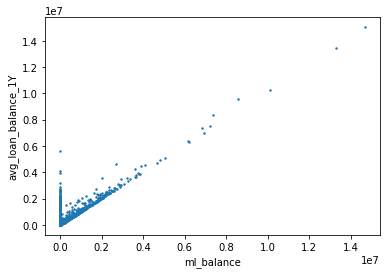

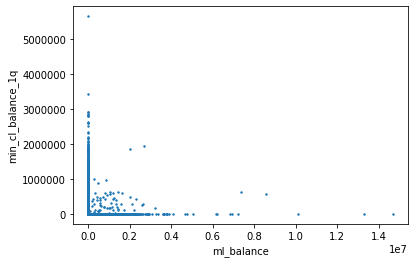

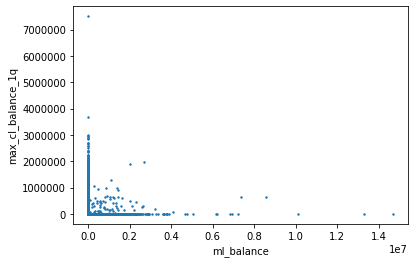

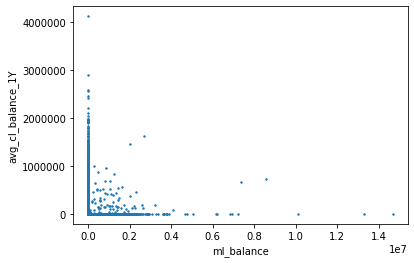

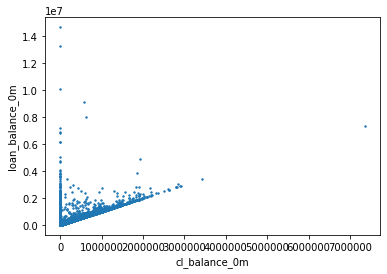

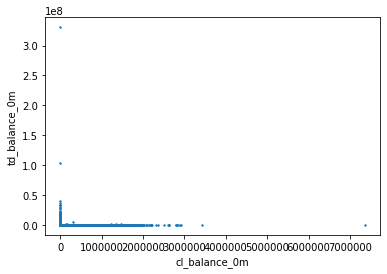

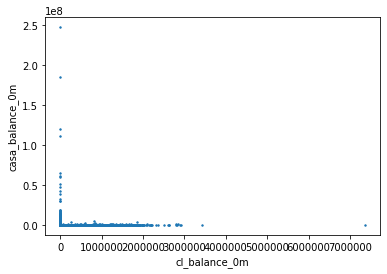

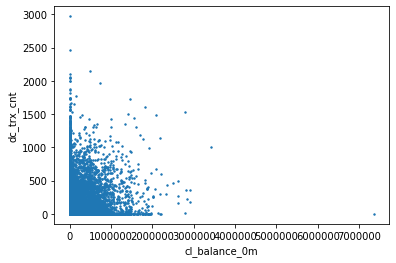

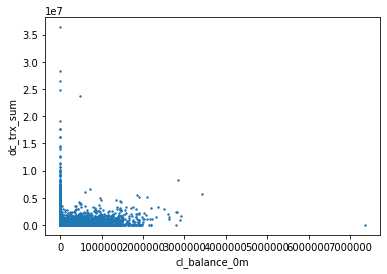

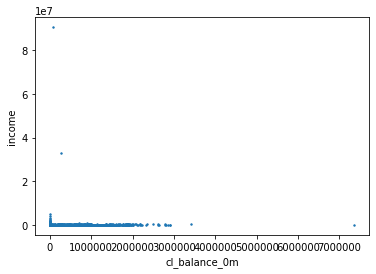

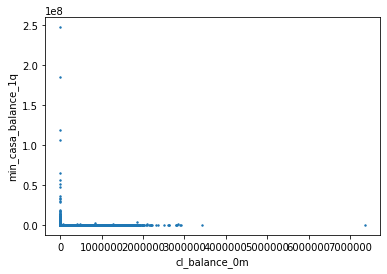

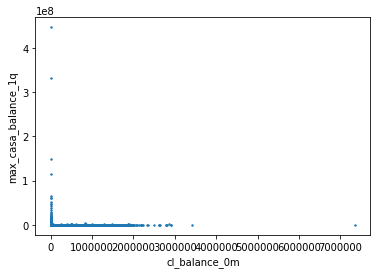

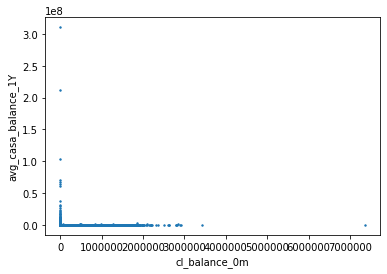

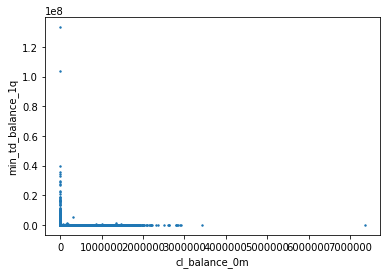

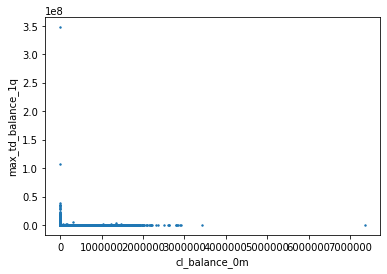

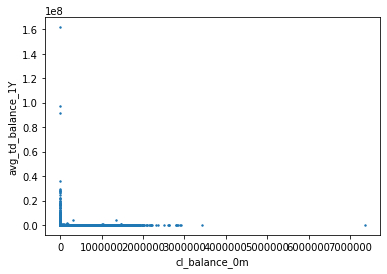

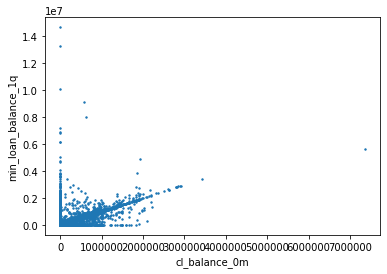

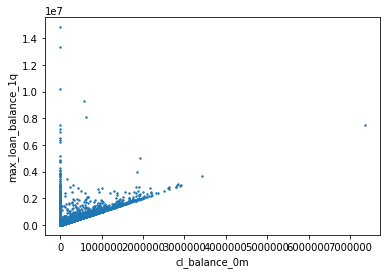

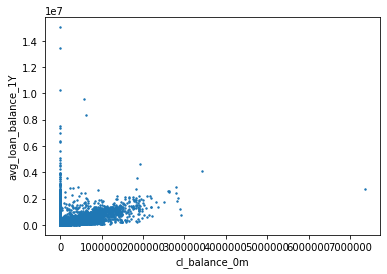

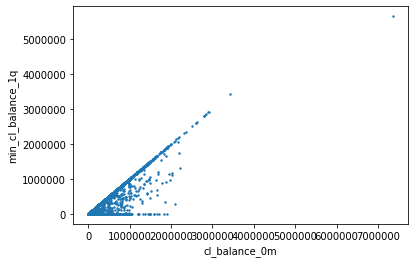

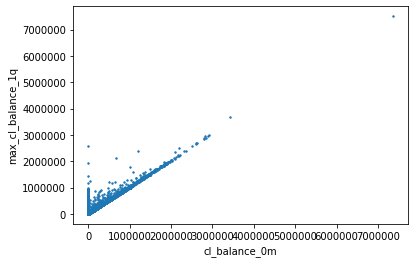

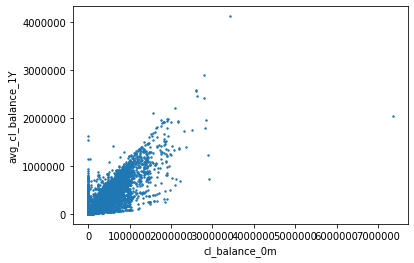

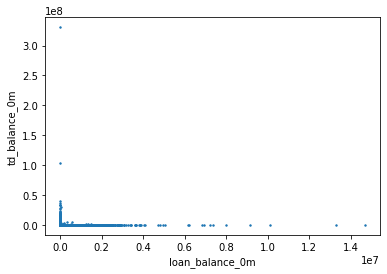

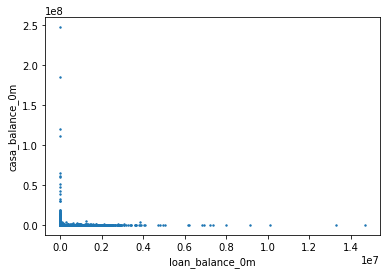

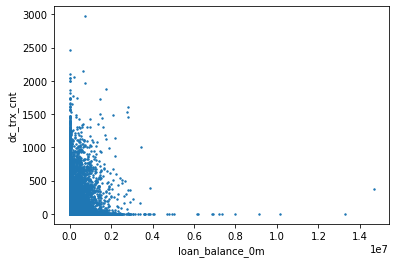

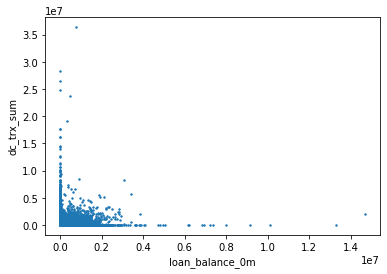

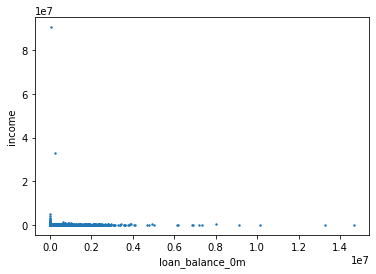

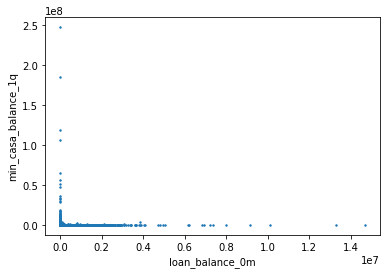

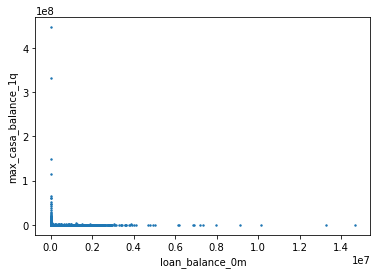

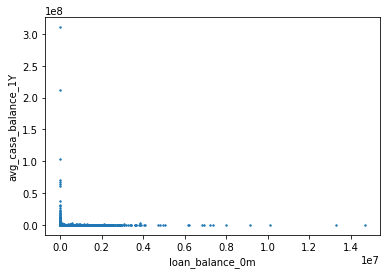

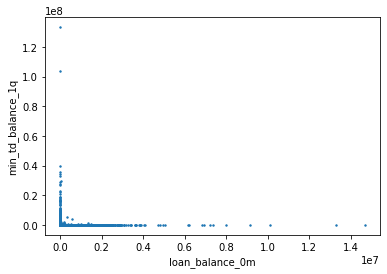

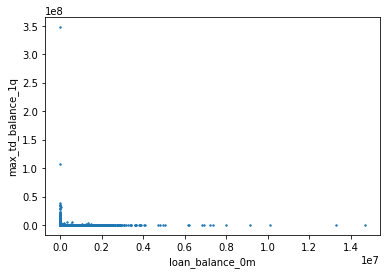

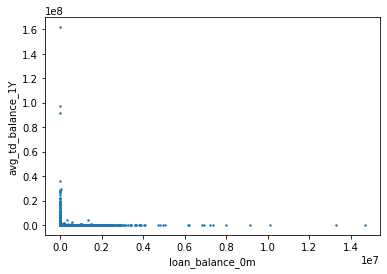

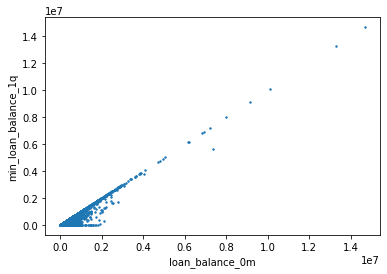

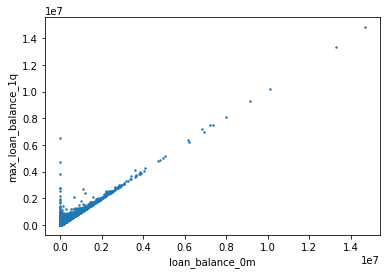

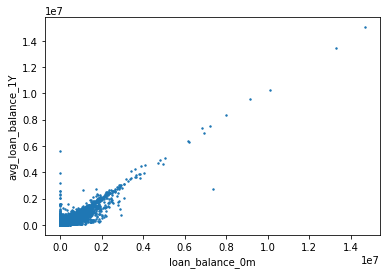

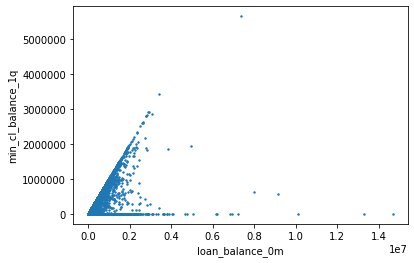

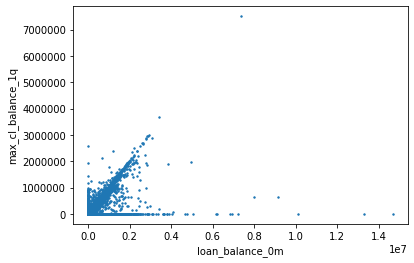

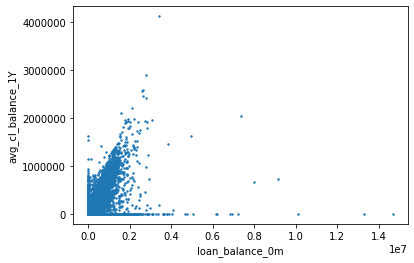

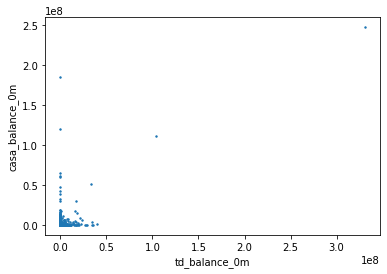

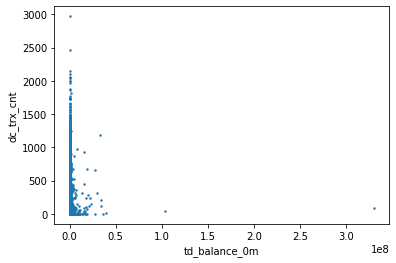

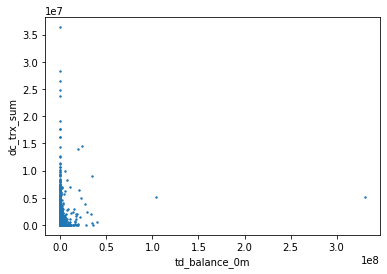

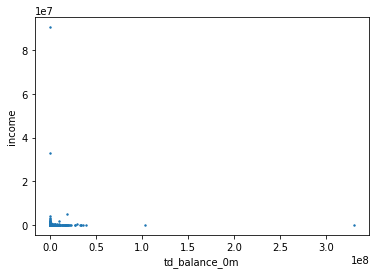

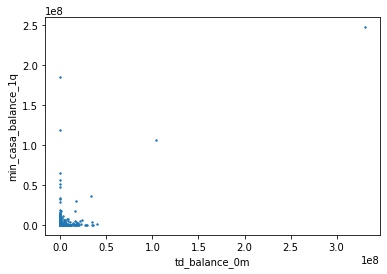

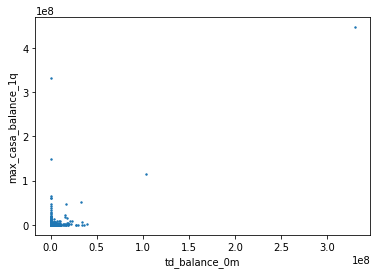

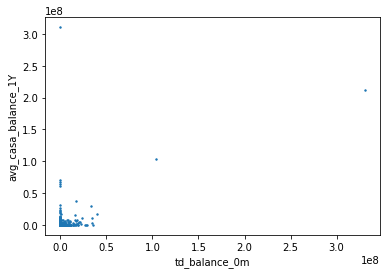

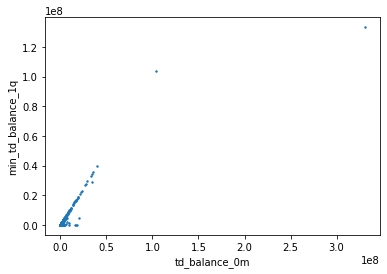

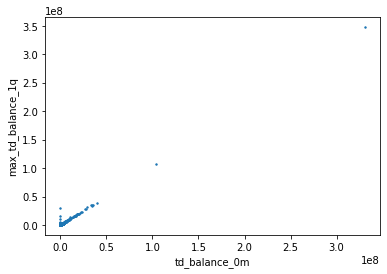

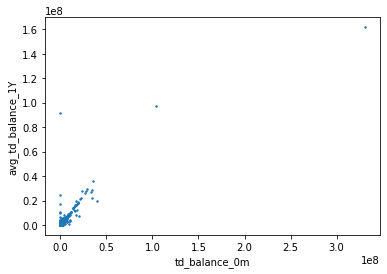

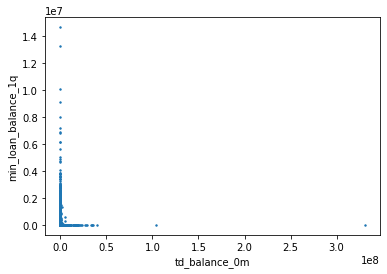

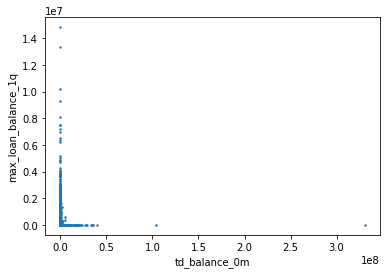

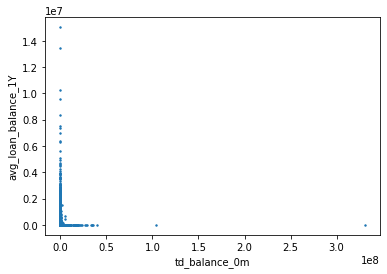

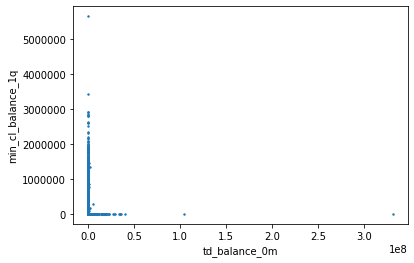

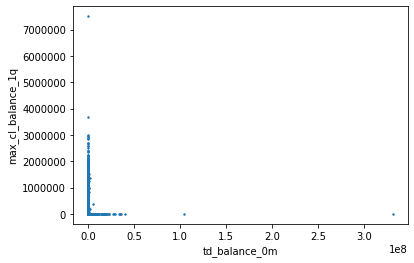

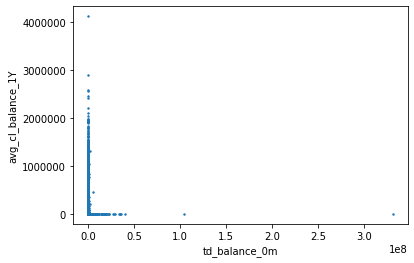

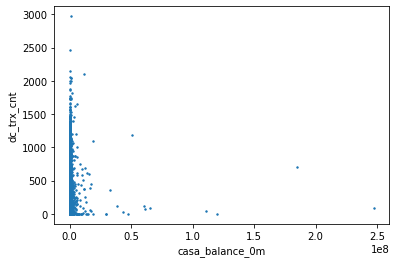

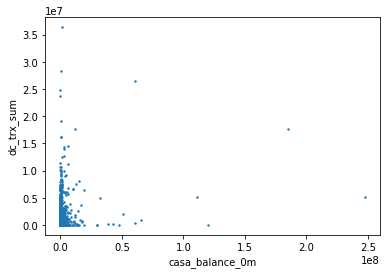

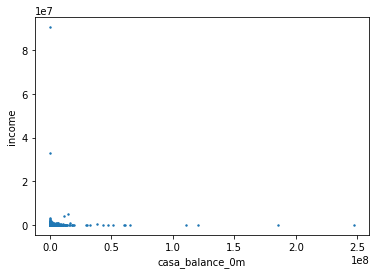

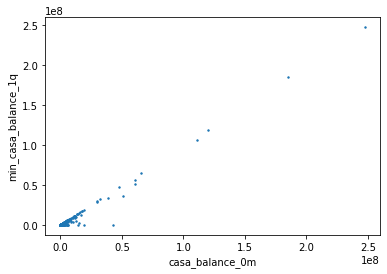

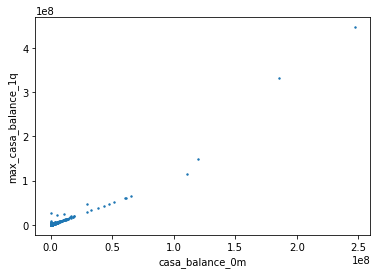

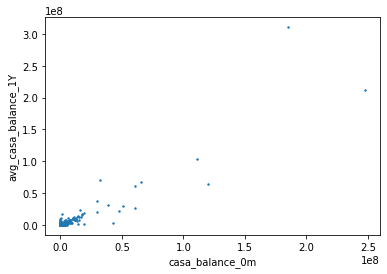

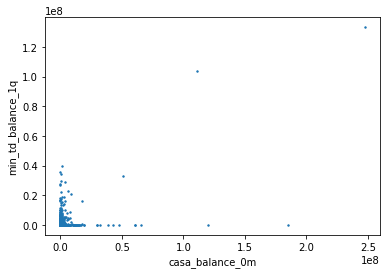

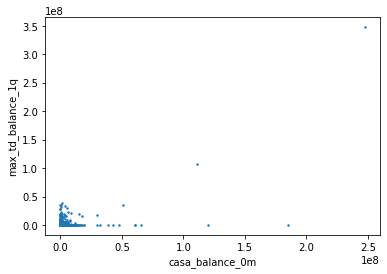

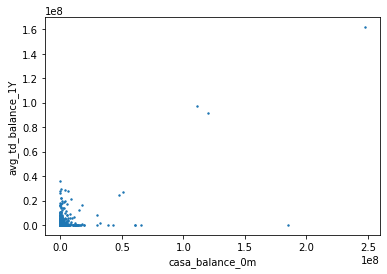

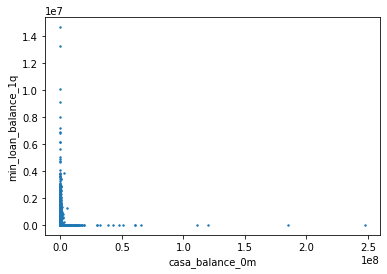

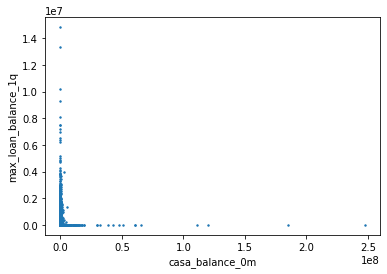

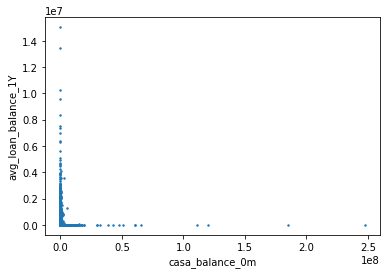

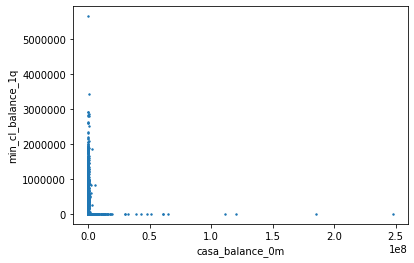

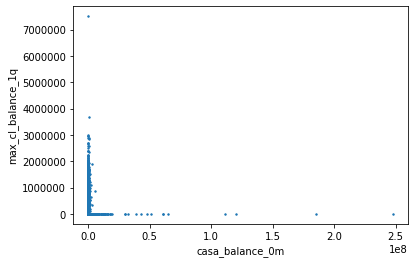

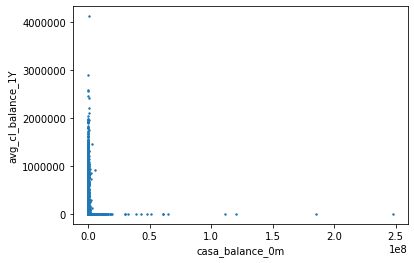

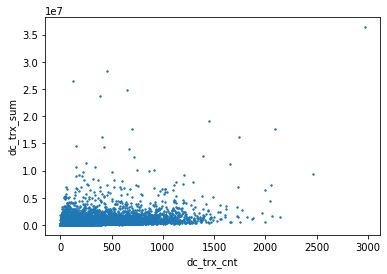

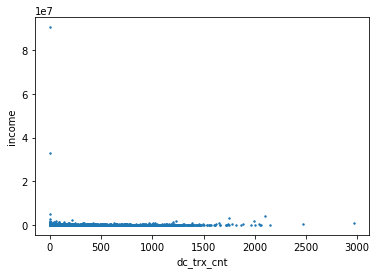

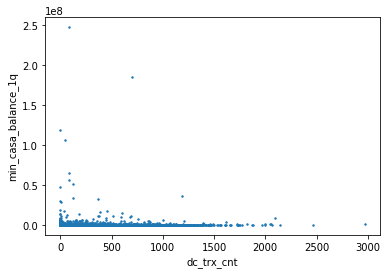

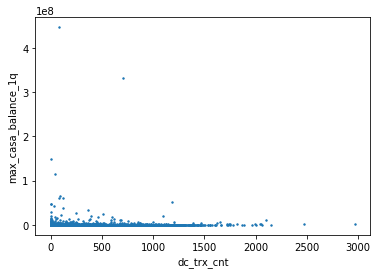

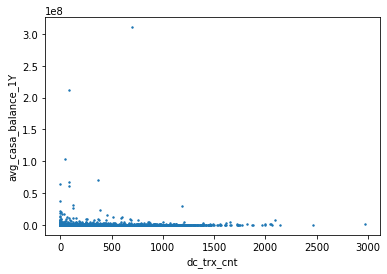

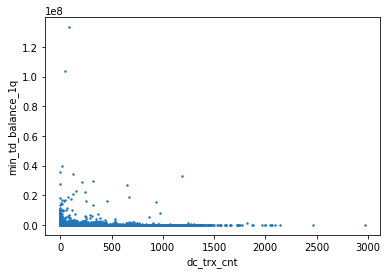

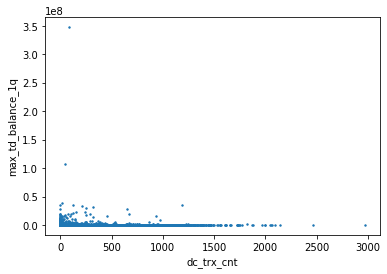

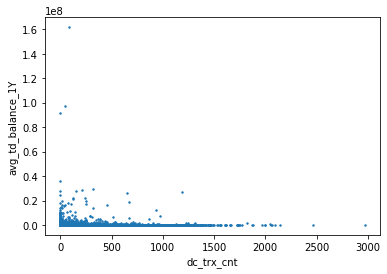

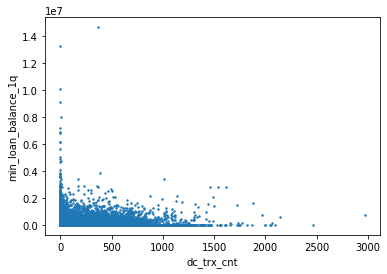

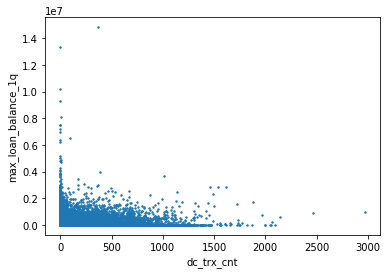

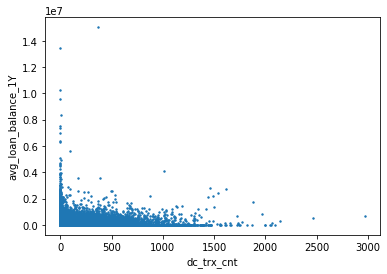

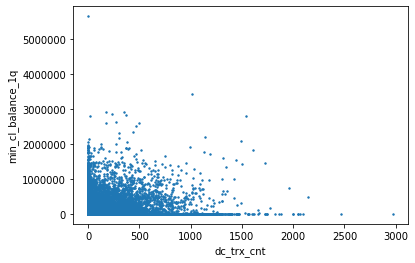

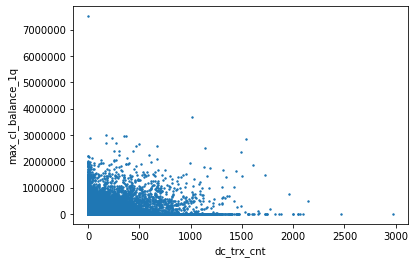

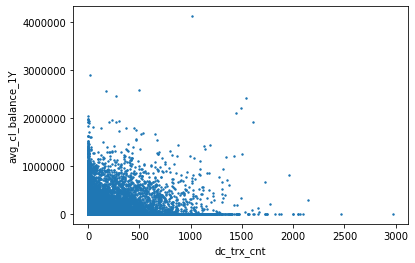

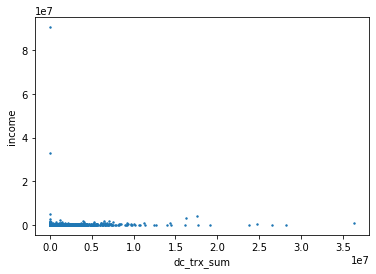

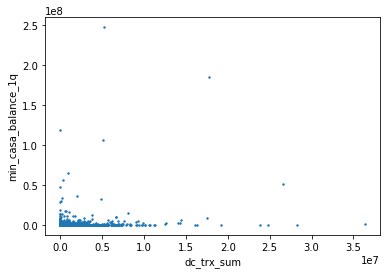

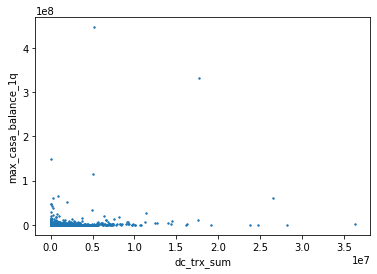

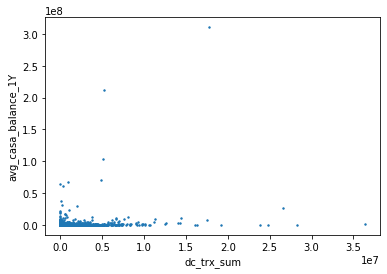

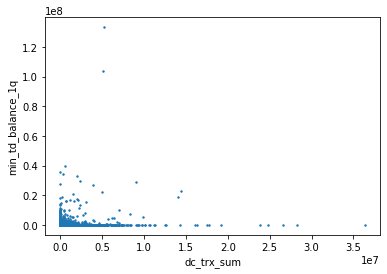

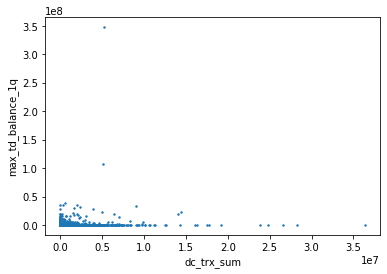

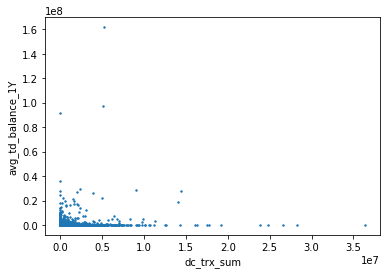

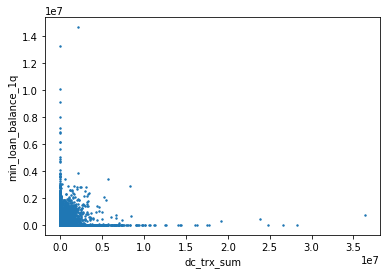

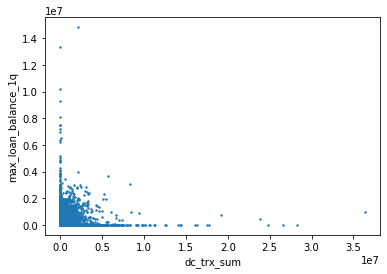

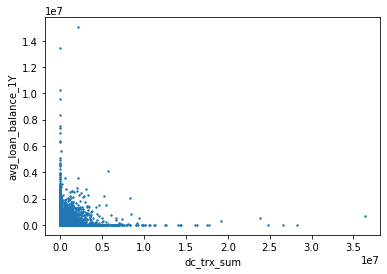

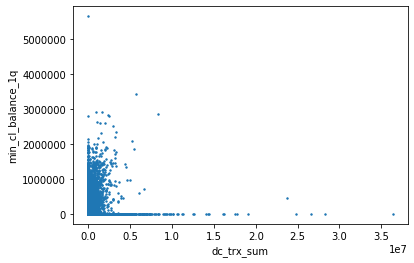

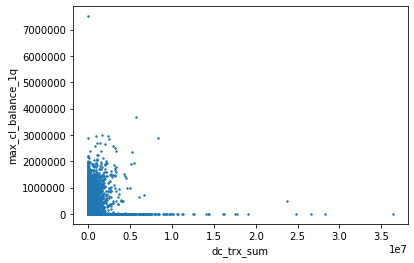

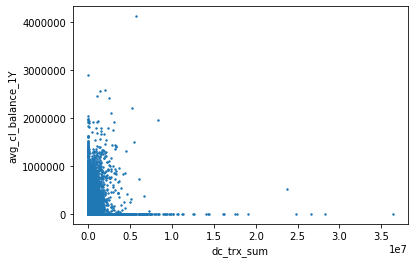

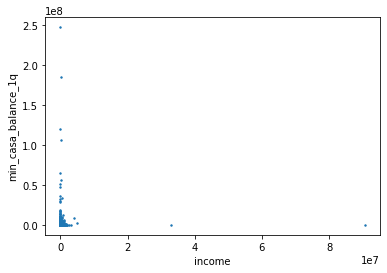

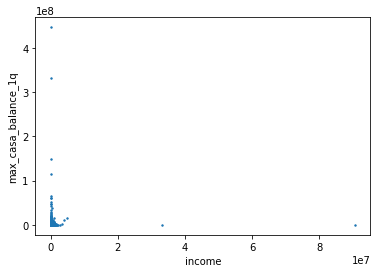

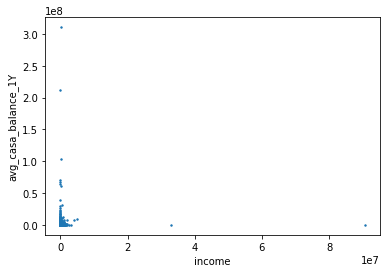

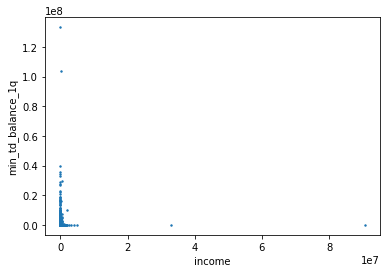

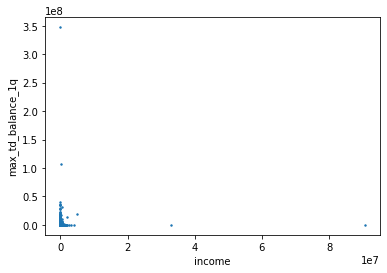

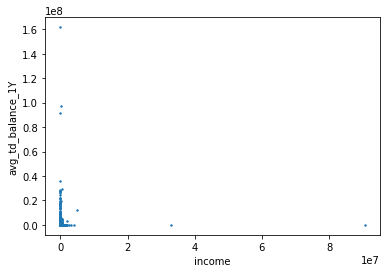

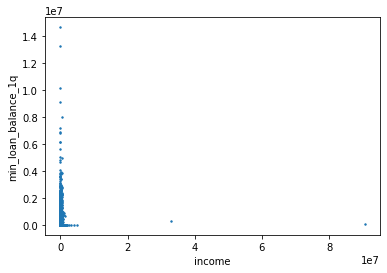

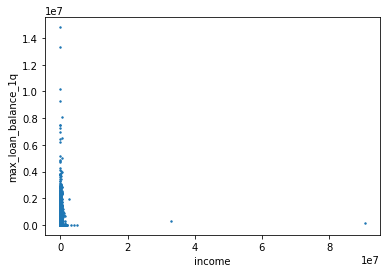

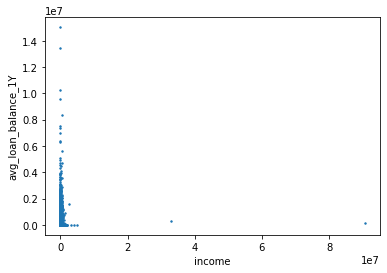

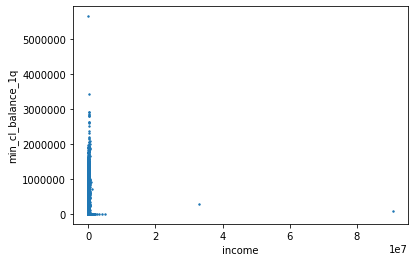

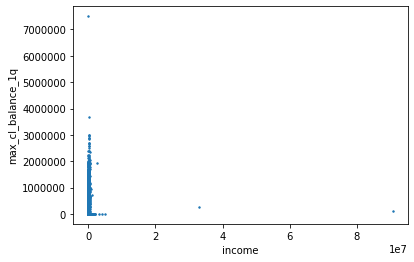

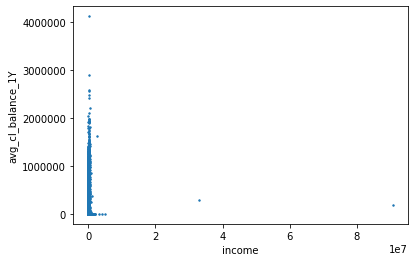

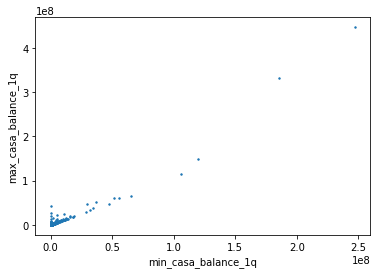

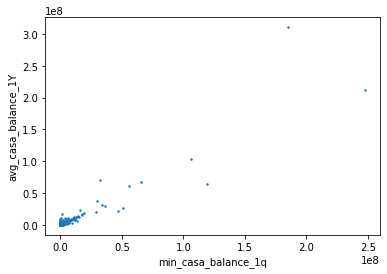

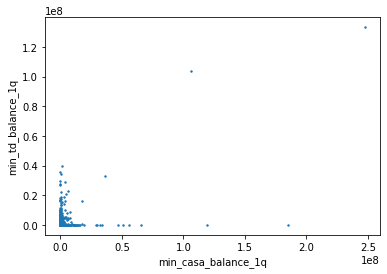

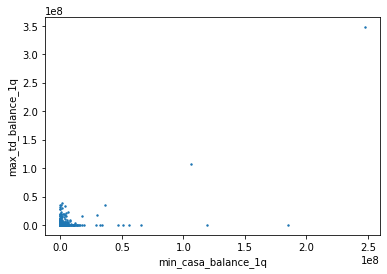

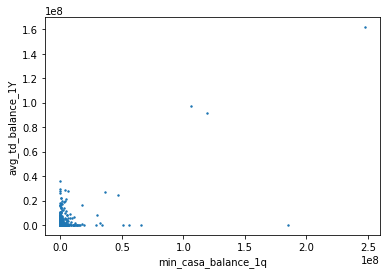

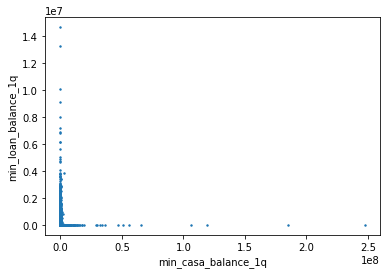

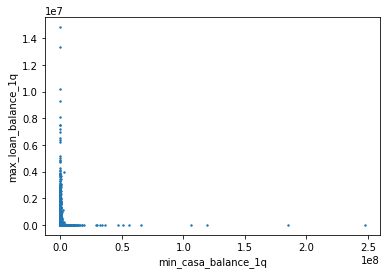

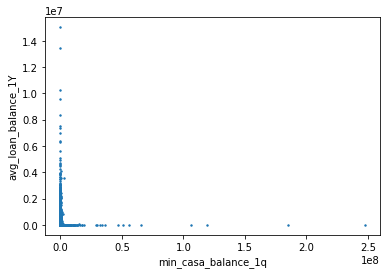

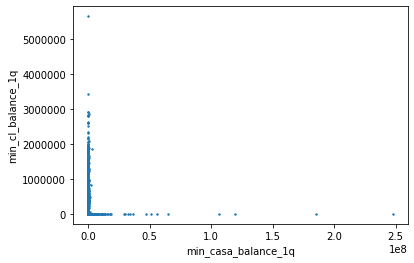

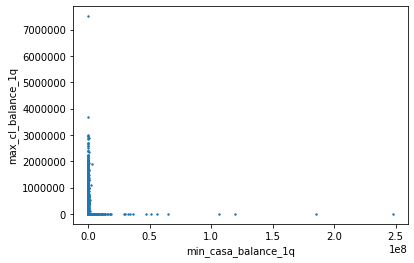

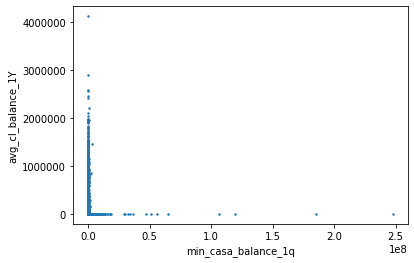

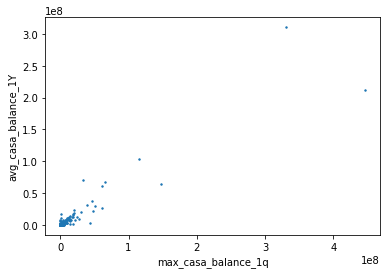

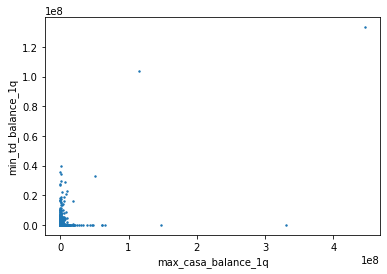

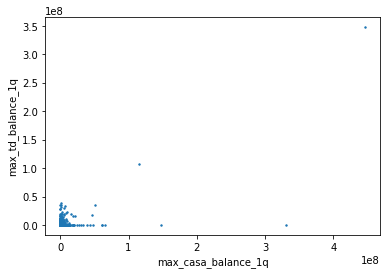

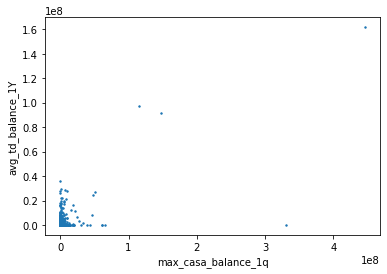

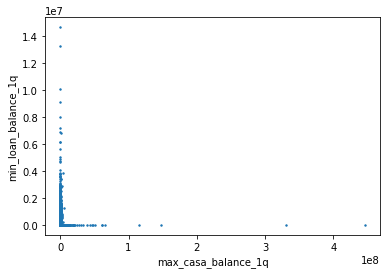

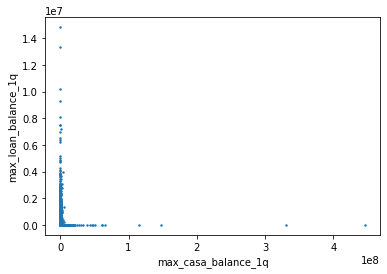

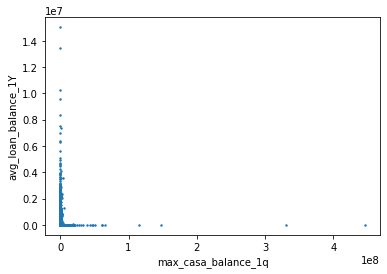

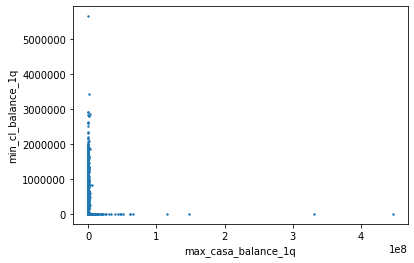

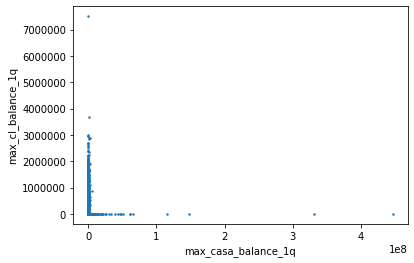

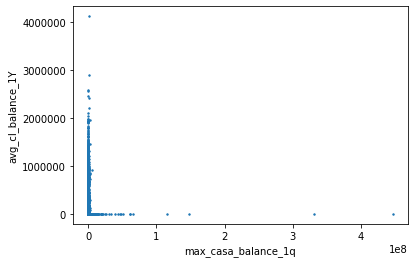

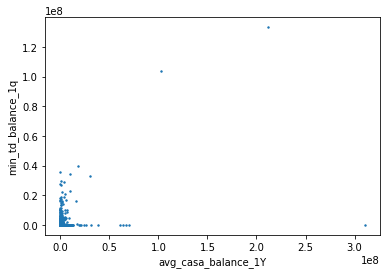

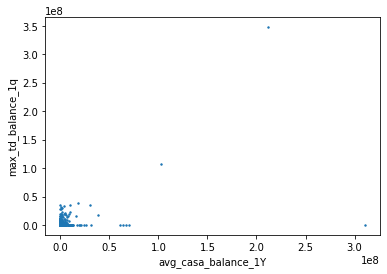

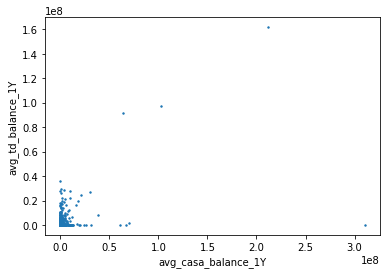

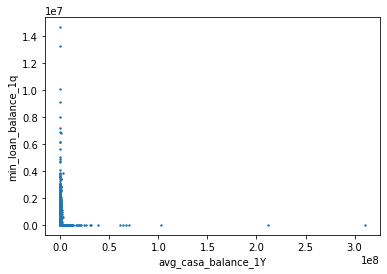

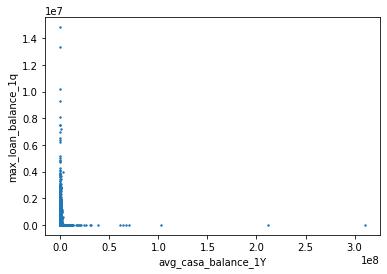

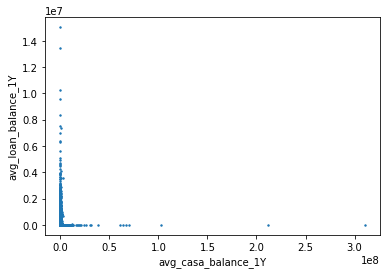

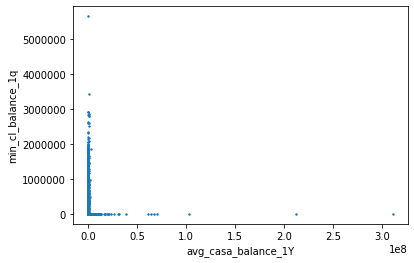

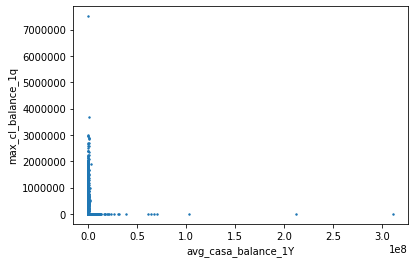

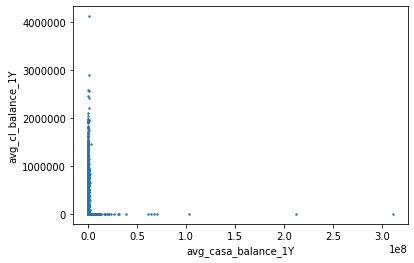

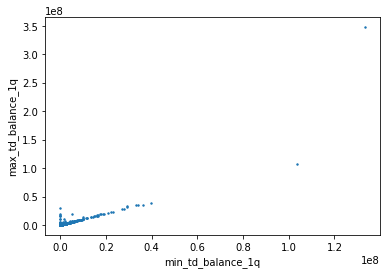

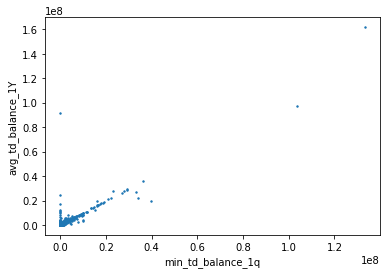

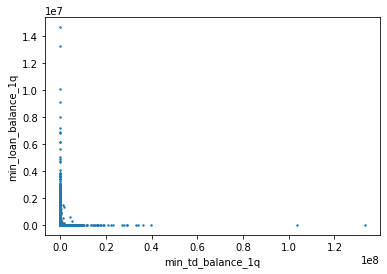

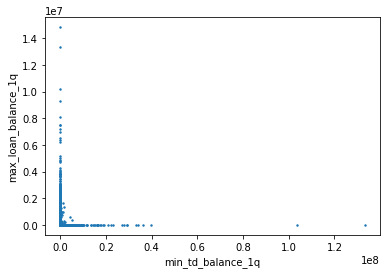

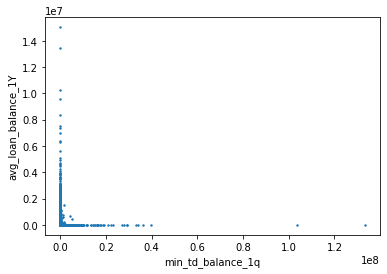

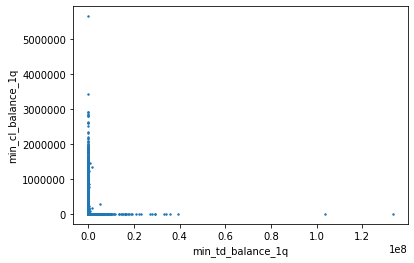

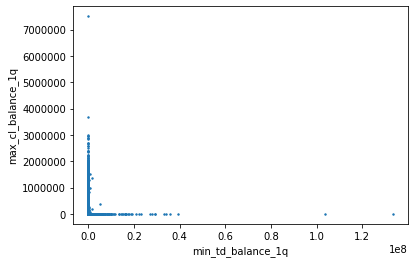

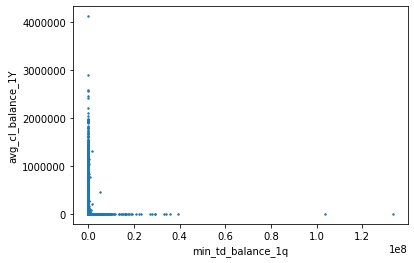

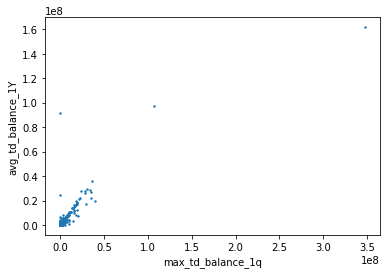

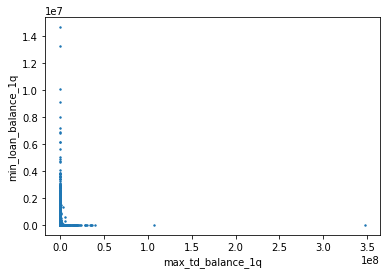

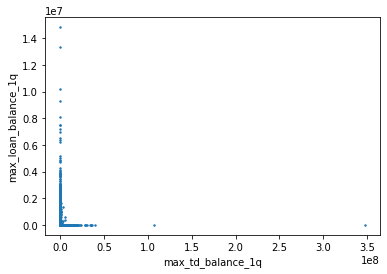

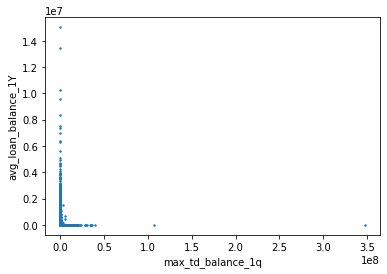

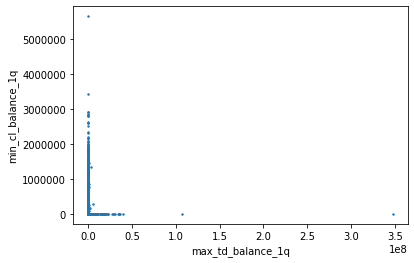

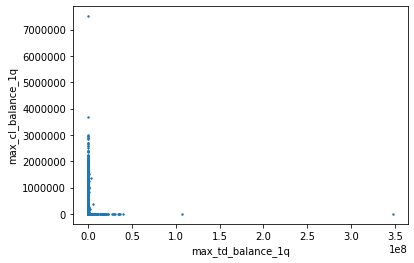

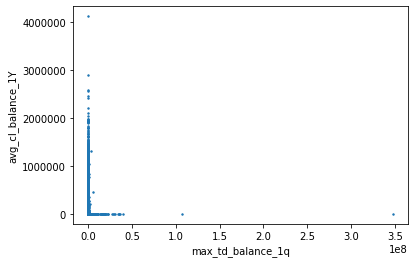

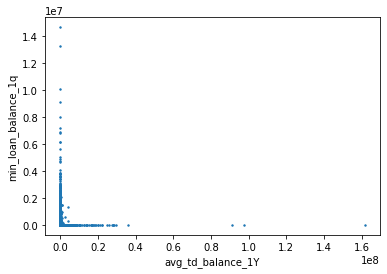

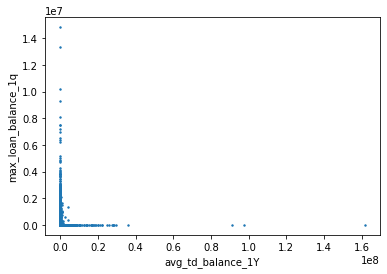

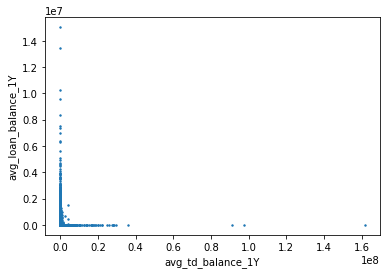

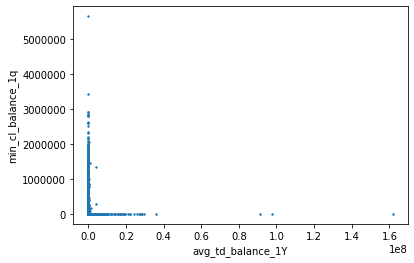

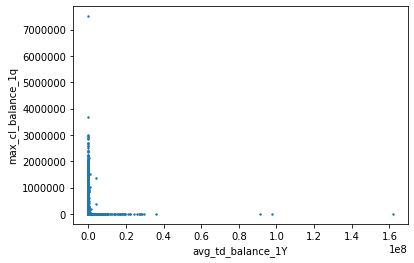

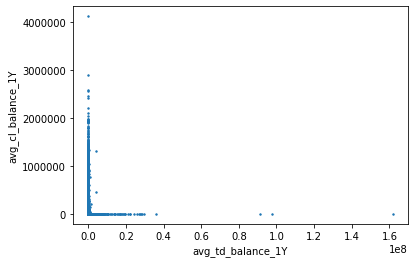

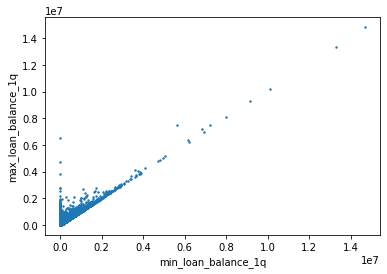

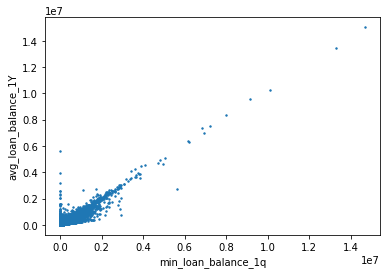

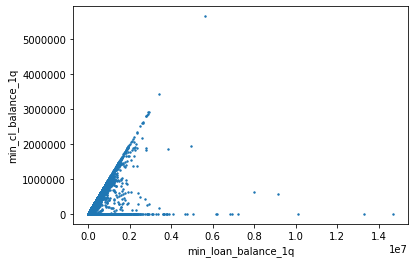

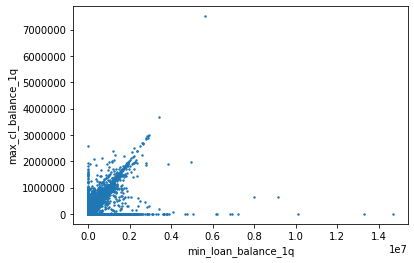

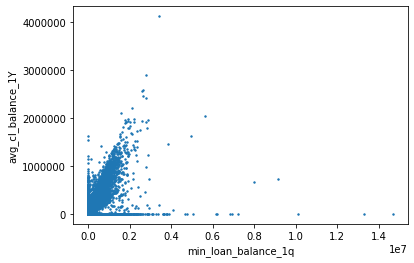

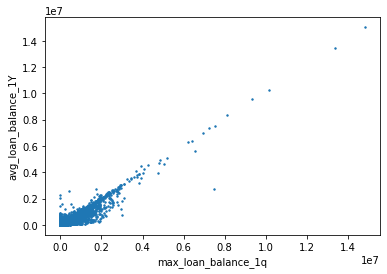

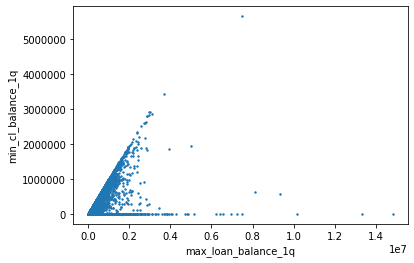

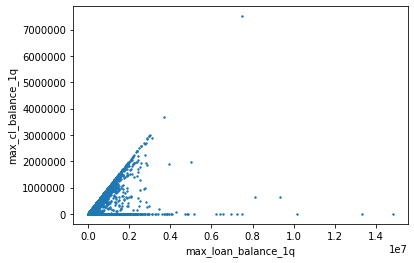

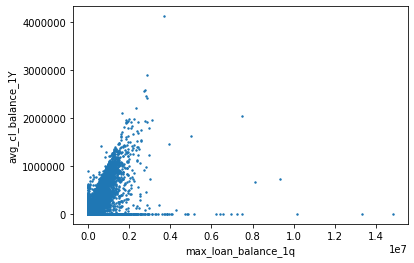

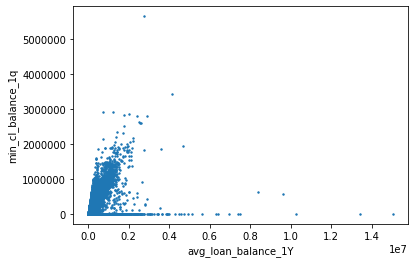

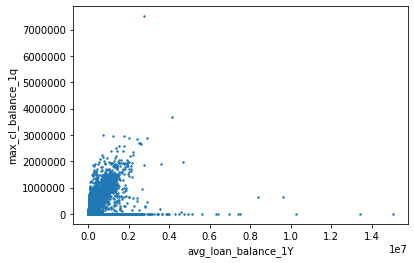

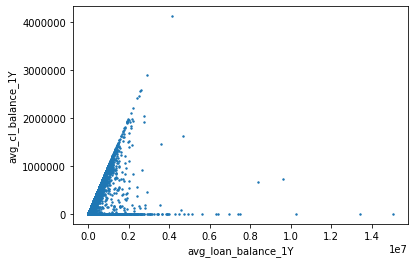

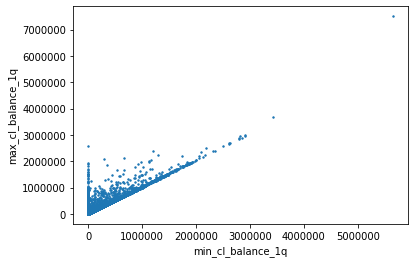

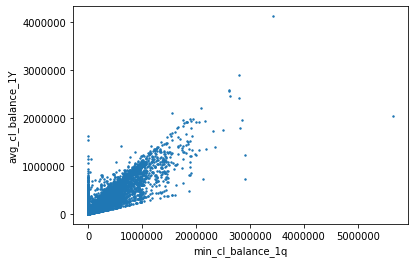

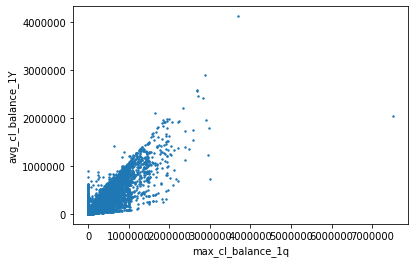

In [20]:
drawed_plt=[]
for col1 in df.columns:
    for col2 in df.columns:
        if col2==col1 or (col1,col2) in drawed_plt:
            continue
        drawed_plt.append((col2,col1))
        plt.scatter(df[col1],df[col2],s=2)
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

### 1.3.1. Ярко выраженных кластеров не видно. Есть интуитивно понятные корреляции между общим кредитом и ипотекой/потребкредитом, а также между средним и минимальным/максимальным значениям по кредитам/остаткам/депозитам. Оценивать поведение клиента лишь по одному кварталу, да к тому же имея только максимум и минимум, неправильно, ИМХО

### 1.3.2. Уберем из рассмотрения коррелирующие данные. Из набора (cl_balance_0m,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y) оставим только avg_cl_balance_1Y

In [21]:
df=df.drop(['cl_balance_0m','min_cl_balance_1q','max_cl_balance_1q'],axis=1)

### 1.3.3. Из набора (loan_balance_0m,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y) оставим только avg_loan_balance_1Y

In [22]:
df=df.drop(['loan_balance_0m','min_loan_balance_1q','max_loan_balance_1q'],axis=1)

### 1.3.4. Из набора (td_balance_0m,min_td_balance_1q,max_td_balance_1q,avg_td_balance_1Y) оставим только avg_td_balance_1Y

In [23]:
df=df.drop(['td_balance_0m','min_td_balance_1q','max_td_balance_1q'],axis=1)

### 1.3.5. Из набора (casa_balance_0m, min_casa_balance_1q, max_casa_balance_1q, avg_casa_balance_1Y) оставим только avg_casa_balance_1Y

In [24]:
df=df.drop(['casa_balance_0m','min_casa_balance_1q','max_casa_balance_1q'],axis=1)

### 1.3.6. Как ни странно, но в данных есть строки, в которых кол-во транзакций не нулевое, а сумма нулевая. Возможно это происходит при авторизации картой в офисе банка. Большинство точек на графике коррелируют, поэтому наверное можно удалить столбец. Но сначала посмотрим на клиентов с максимальными расходами по картам

In [25]:
df.loc[df.dc_trx_sum>10000000]

,full_mob,ml_balance,dc_trx_cnt,dc_trx_sum,income,avg_casa_balance_1Y,avg_td_balance_1Y,avg_loan_balance_1Y,avg_cl_balance_1Y
3579,30,0.0,751,1.012248e+07,0.00,1.755472e+05,0.000000e+00,0.00000,0.00000
3737,40,0.0,1453,1.912783e+07,0.00,2.390401e+05,0.000000e+00,284674.61917,0.00000
7748,164,0.0,154,1.446490e+07,0.00,1.025828e+07,2.774500e+07,0.00000,0.00000
7968,19,0.0,673,1.401790e+07,0.00,3.457444e+06,1.900000e+07,0.00000,0.00000
9017,81,0.0,1748,1.626533e+07,3216499.65,6.474208e+05,0.000000e+00,0.00000,0.00000
9445,73,0.0,702,1.772260e+07,139687.00,3.103200e+08,0.000000e+00,0.00000,0.00000
10201,81,0.0,121,2.654913e+07,0.00,2.618593e+07,1.166667e+03,0.00000,0.00000
13416,64,0.0,387,2.378931e+07,25001.00,6.102819e+04,0.000000e+00,511470.35083,511470.35083
14920,124,0.0,1655,1.122672e+07,904800.00,5.261065e+06,0.000000e+00,0.00000,0.00000
15302,81,0.0,912,1.006913e+07,611760.38,1.266966e+06,0.000000e+00,790.00000,0.00000


### 1.3.7. Клиент с самой большой суммой транзакций по картам (3.6e+07) за этот период заработал 706 778 рублей и имеет на счете 999 909 рублей. Средняя величина транзакции порядка 12 000 рублей. Еще у него нет ипотеки и потребительского кредита, тем не менее общий объем долговой нагрузки 674 472 рубля. Самая большая средняя транзакция у клиента с ID 10201 - почти 220 000. Ну вот что он такое покупает ? Даже в банкомате можно снять не более 200 000 за раз. С нулевым доходом к тому же. Резюме - кол-во транзакций при имеющихся данных нам не поможет

In [26]:
df=df.drop('dc_trx_cnt',axis=1)

### 1.4. Построим графики еще раз

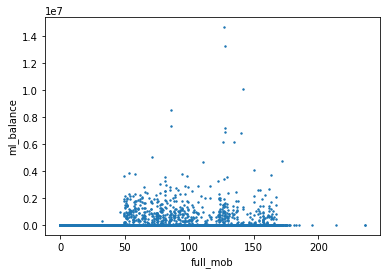

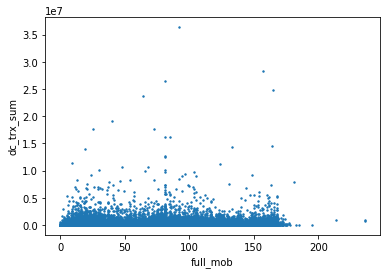

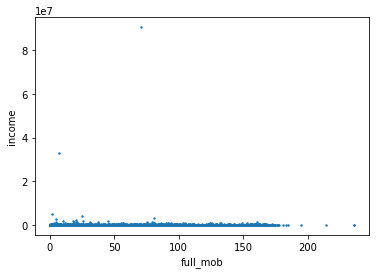

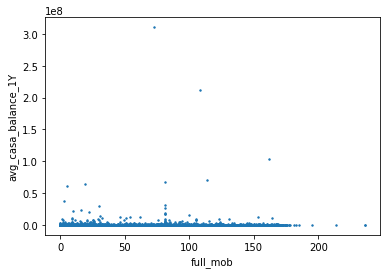

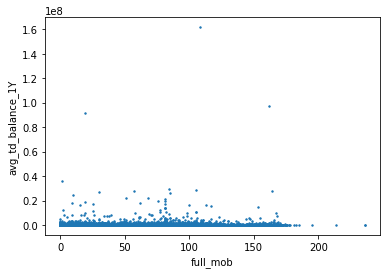

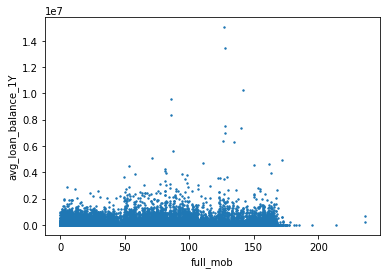

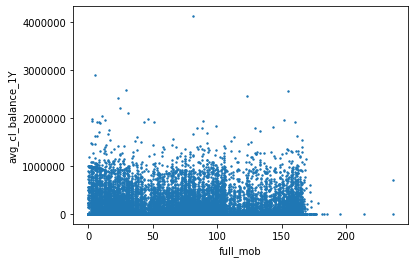

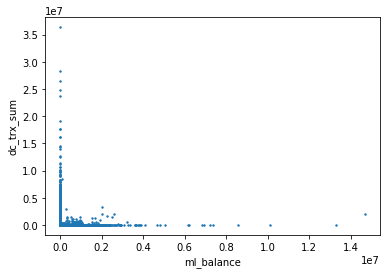

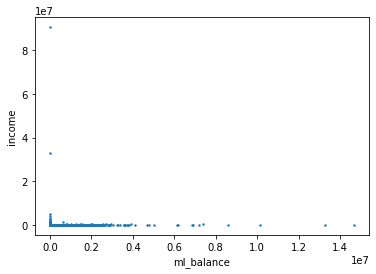

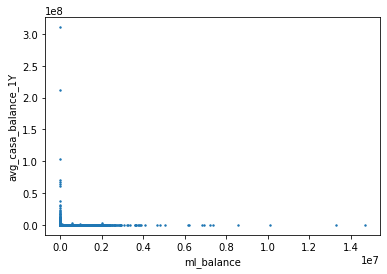

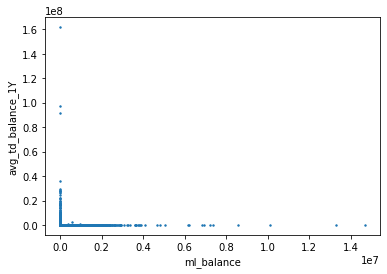

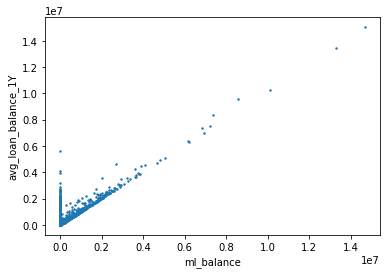

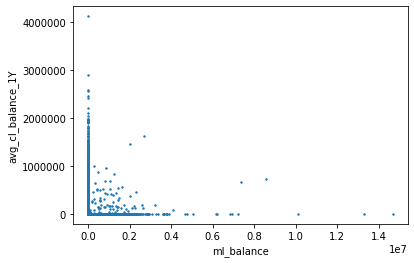

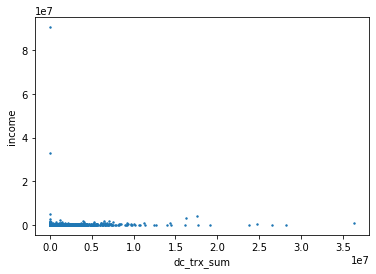

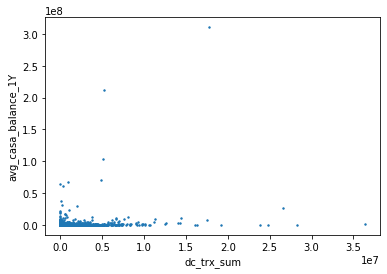

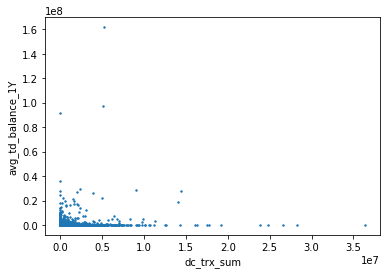

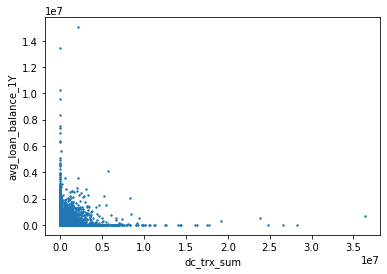

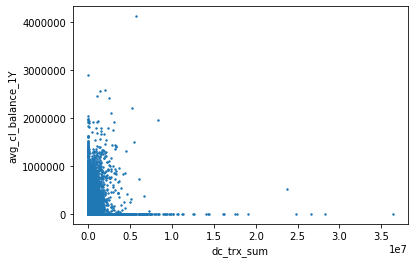

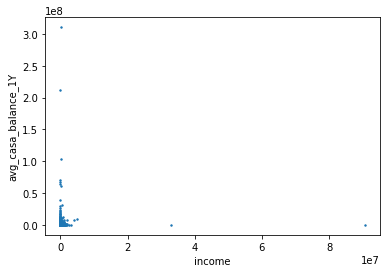

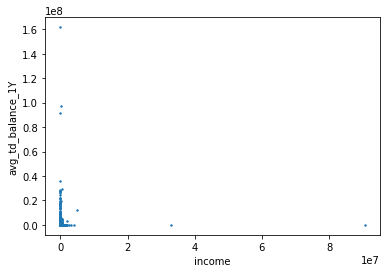

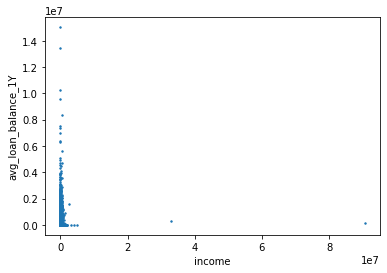

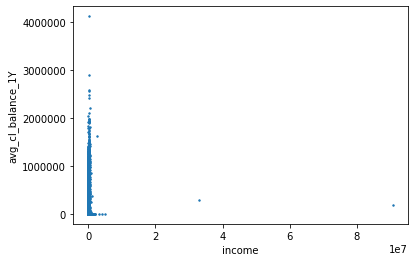

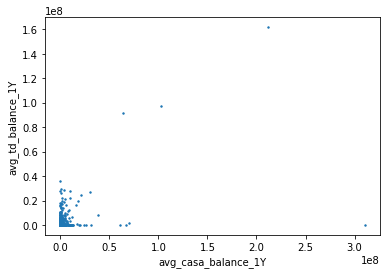

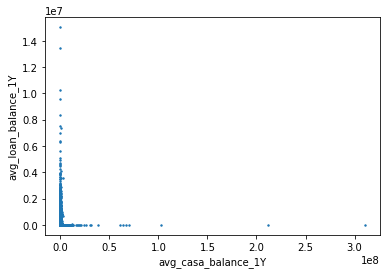

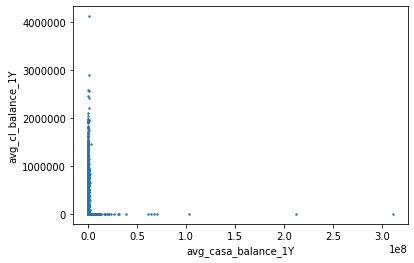

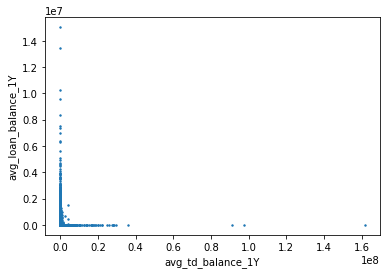

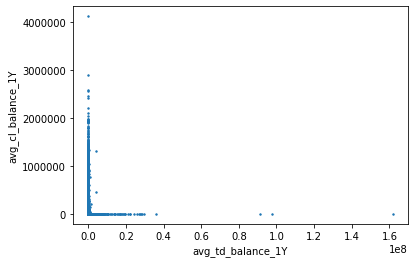

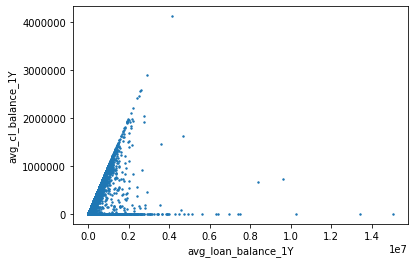

In [27]:
drawed_plt=[]
for col1 in df.columns:
    for col2 in df.columns:
        if col2==col1 or (col1,col2) in drawed_plt:
            continue
        drawed_plt.append((col2,col1))
        plt.scatter(df[col1],df[col2],s=2)
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

### 1.4.1. Параметр full_mob имеет интересную связь с размером ипотеки - кредит имеют клиенты с full_mob>=50. К сожалению, я не знаю, в чем он измеряется и как расшифровывается. Может Months Of Bussiness. А вот с потребительским кредитованием такой связи нет. Скорее всего это связано с тем, что кредитные карты банк выдает направо-налево, а процент одобрения ипотеки не очень высокий. Период, за который предоставлены данные, не указан, но за последние 3-5 лет банки удовлетворяли 50-70% заявок по данным Коммерсанта.

In [28]:
df=df.drop('full_mob',axis=1)

### 1.4.2. Еще из графиков видно, что у людей с ипотекой зачастую отсутствует доход (income).

In [29]:
df.loc[(df.income==0)&(df.ml_balance>0)].shape[0]

466

In [30]:
df.loc[df.ml_balance>0].shape[0]

574

### 1.4.2.1. Вот мне интересно, - как такое может быть ? Ипотеку без справки о доходах не давали никогда. Было время, когда не требовалась НДФЛ-2, но банки все равно просили справку с места работы. Считаю, что валидность поля income крайне низкая, так как у 80% ипотечников данных по доходам либо нет, либо доход равен нулю.

### 1.4.2.2. Была у меня еще мысль, что может это не доход клиента вообще, а доход с депозитов в Сбере, но график avg_td_balance_1Y/income показывает отсутствие корреляции. Убиваем income

In [31]:
df=df.drop('income',axis=1)

### 1.4.3. Посмотрим, что у нас осталось

In [32]:
df.columns

Index(['ml_balance', 'dc_trx_sum', 'avg_casa_balance_1Y', 'avg_td_balance_1Y',
       'avg_loan_balance_1Y', 'avg_cl_balance_1Y'],
      dtype='object')

### 2. Займемся кластеризацией

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### 2.1. В данных очень много нулей. Это видимо означает, что клиенты не пользуются этой услугой. На мой взгляд глупо считать возможную принадлежность к одному кластеру клиентов с разными продуктами. Клиент, у которого рубль на депозите, на мой взгляд ближе к клиенту, у которого 100 рублей, чем к тому, у которого ноль. 

### 2.1.1. Построим дерево кластеров по принципу наличия нулей в колонках

In [34]:
# all_df=[]
# all_df_describe=[]

In [35]:
# for col in df.columns:
#     print(col,df.loc[df[col]==0].shape[0])

### 2.1.2. Больше всего нулей в графе ипотека. Т.е. ипотечников всего 574 человека. Выделим их в отдельный кластер. Остальных продолжим кластеризовать

In [36]:
# df_ml_balance=df.loc[df.ml_balance>0]
# df=df.drop('ml_balance',axis=1)

In [37]:
# all_df.append(df_ml_balance)
# all_df_title.append('mortgage')

### 2.1.3. Снова посчитаем нули в колонках

In [38]:
# for col in df.columns:
#     print(col,df.loc[df[col]==0].shape[0])

### 2.1.4. Выделим депозитчиков и посмотрим на них

In [39]:
# df_deposit=df.loc[df.avg_td_balance_1Y>0]

In [40]:
# df_deposit.shape[0]

In [41]:
# for col in df_deposit.columns:
#     print(col,df_deposit.loc[df_deposit[col]==0].shape[0])

### 2.1.5. Выделим депозитчиков с кредитами

In [42]:
# df_deposit_loan=df_deposit.loc[(df_deposit.avg_loan_balance_1Y>0)|(df_deposit.avg_cl_balance_1Y>0)]

In [43]:
# all_df.append(df_deposit_loan)
# all_df_title.append('deposit_loan')

In [44]:
# df_deposit_not_loan=df_deposit.drop(['avg_loan_balance_1Y','avg_cl_balance_1Y'],axis=1)

In [45]:
# for col in df_deposit_not_loan.columns:
#     print(col,df_deposit_not_loan.loc[df_deposit_not_loan[col]==0].shape[0])

### 2.1.7. Можно долго и упорно так продолжать, но вроде наметился алгоритм - берем датафрейм, смотрим столбец с максимальным кол-вом нулей, выделяем в датафрейме строки с ненулевыми значениями в этом столбце. Если кол-во строк в получившемся датафрейме меньше какого-то числа, то записываем его в дерево. Если нет, то дробим дальше, пока в нем не останется столбцов с нулями. Будем пытаться поддерживать древовидную структуру

In [46]:
df.columns

Index(['ml_balance', 'dc_trx_sum', 'avg_casa_balance_1Y', 'avg_td_balance_1Y',
       'avg_loan_balance_1Y', 'avg_cl_balance_1Y'],
      dtype='object')

In [47]:
def dfs(dataframe,describe):
    if len(dataframe.columns) == 0:
        all_df.append(dataframe)
        all_df_describe.append(describe)
        return
    current_quantity_zero = 0
    current_column = 'fake'
    for col in dataframe.columns:
        if dataframe.loc[dataframe[col] == 0].shape[0] > current_quantity_zero:
            current_quantity_zero = dataframe.loc[dataframe[col] == 0].shape[0]
            current_column = col
    if current_column == 'fake':
        all_df.append(dataframe)
        all_df_describe.append(describe)
        return
    new_dataframe = dataframe.loc[dataframe[current_column] > 0]
    if new_dataframe.shape[0] > df_threshold:
        dfs(new_dataframe,describe+current_column+'>0 ')
    else:
        all_df.append(new_dataframe)
        all_df_describe.append(describe+current_column+'>0 ')
    dataframe=dataframe.loc[dataframe[current_column]==0]
    dataframe = dataframe.drop(current_column,axis=1)
    if dataframe.shape[0]>df_threshold:
        dfs(dataframe,describe+current_column+'=0 ')
    else:
        all_df.append(dataframe)
        all_df_describe.append(describe+current_column+'=0 ')
        return


In [48]:
df_threshold=1000
all_df=[]
all_df_describe=[]
dfs(df,"")

### 2.1.8. Посмотрим, что получилось - сколько датафреймов, их размер и сумму размеров

In [49]:
len(all_df)

19

In [50]:
all_shape=0
for df_ in all_df:
    all_shape+=df_.shape[0]

In [51]:
all_shape

50000

In [52]:
for i in range(len(all_df)):
    print(all_df[i].shape,all_df_describe[i])

(574, 6) ml_balance>0 
(184, 5) ml_balance=0 avg_td_balance_1Y>0 avg_cl_balance_1Y>0 
(145, 4) ml_balance=0 avg_td_balance_1Y>0 avg_cl_balance_1Y=0 avg_loan_balance_1Y>0 
(1384, 3) ml_balance=0 avg_td_balance_1Y>0 avg_cl_balance_1Y=0 avg_loan_balance_1Y=0 dc_trx_sum>0 avg_casa_balance_1Y>0 
(14, 2) ml_balance=0 avg_td_balance_1Y>0 avg_cl_balance_1Y=0 avg_loan_balance_1Y=0 dc_trx_sum>0 avg_casa_balance_1Y=0 
(1479, 2) ml_balance=0 avg_td_balance_1Y>0 avg_cl_balance_1Y=0 avg_loan_balance_1Y=0 dc_trx_sum=0 avg_casa_balance_1Y>0 
(598, 1) ml_balance=0 avg_td_balance_1Y>0 avg_cl_balance_1Y=0 avg_loan_balance_1Y=0 dc_trx_sum=0 avg_casa_balance_1Y=0 
(5724, 4) ml_balance=0 avg_td_balance_1Y=0 avg_cl_balance_1Y>0 dc_trx_sum>0 avg_casa_balance_1Y>0 
(25, 3) ml_balance=0 avg_td_balance_1Y=0 avg_cl_balance_1Y>0 dc_trx_sum>0 avg_casa_balance_1Y=0 
(3458, 3) ml_balance=0 avg_td_balance_1Y=0 avg_cl_balance_1Y>0 dc_trx_sum=0 avg_casa_balance_1Y>0 
(67, 2) ml_balance=0 avg_td_balance_1Y=0 avg_cl_balan

### 2.2. Итак, мы кластеризовали весь датафрейм по продуктам и поведению. С одной стороны это конечно все о продуктах, но использование карт можно отнести к поведению. Описание групп сделано на языке предоставленных данных. В принципе я считаю, что задание выполнено, но давайте еще кластеризуем данные внутри больших групп. Это разделение будет видимо по уровню финансового благополучия. Еще можем найти закономерности и аномалии внутри групп

### 2.2.1. Возьмем самую большую группу и попробуем ее разбить на мелкие

### 2.2.1.1. Сделаем два варианта - с нормализацией и без, а также поищем аномалии

In [53]:
df1=all_df[15]
df1.shape

(22342, 2)

In [54]:
df1.columns

Index(['dc_trx_sum', 'avg_casa_balance_1Y'], dtype='object')

### 2.2.1.2. Поищем аномалии. Сначала найдем среднее и дисперсию

In [55]:
mu=[]
sigma=[]
for col in df1.columns:
    mu.append(df1[col].mean())
    sigma.append(df1[col].std())

### 2.2.1.3. Зададим функию

In [56]:
def prob(x,mu,sigma):
    return np.exp(-(x-mu)*(x-mu)/(2*sigma*sigma))

### 2.2.1.4. Посчитаем отклонения

In [57]:
df1['eps']=prob(df1.dc_trx_sum,mu[0],sigma[0])*prob(df1.avg_casa_balance_1Y,mu[1],sigma[1])

In [58]:
mu,sigma

([290319.32142635377, 67135.3949895335], [597060.9525808656, 2198475.97157115])

In [59]:
df1.eps.describe()

count    22342.000000
mean         0.898724
std          0.173288
min          0.000000
25%          0.895673
50%          0.941340
75%          0.982444
max          0.999997
Name: eps, dtype: float64

In [60]:
df1.loc[df1.eps<0.01].shape[0]

236

### 2.2.1.5. Уберем аномалии и построим график

In [61]:
df1=df1.loc[df1.eps>0.01]

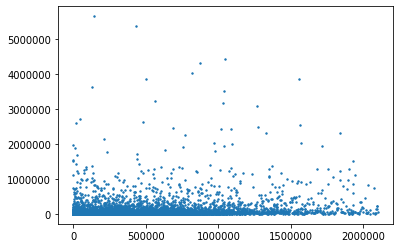

In [62]:
plt.scatter(df1.dc_trx_sum,df1.avg_casa_balance_1Y,s=2)
plt.show()

### 2.2.1.6. Ну в-общем непонятно, что тут кластеризовать. 

### 2.2.2. Возьмем другую группу. Ее описание - ml_balance=0 avg_td_balance_1Y=0 avg_cl_balance_1Y>0 dc_trx_sum=0 avg_casa_balance_1Y>0. У клиентов нет ипотеки, депозитов и операций по картам

In [63]:
df1=all_df[9]
df1

,avg_casa_balance_1Y,avg_loan_balance_1Y,avg_cl_balance_1Y
16,8001.347500,1.938726e+05,193872.62833
27,125.933333,3.280406e+05,328040.61167
47,458.172500,1.574185e+05,157418.47750
55,254.402500,1.043409e+05,104340.92750
56,302.008333,3.570008e+05,357000.79500
...,...,...,...
49902,16523.700000,9.613282e+05,961328.16083
49906,4199.653333,9.611054e+05,881336.90583
49915,175.445833,2.838331e+04,23802.72250
49950,6356.845833,1.701641e+06,723945.18667


### 2.2.2.1. Построим сначала попарные графики

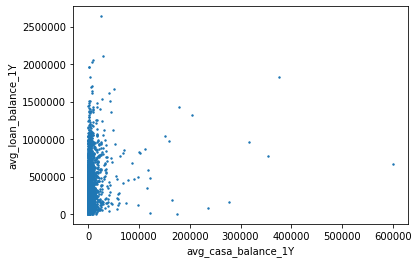

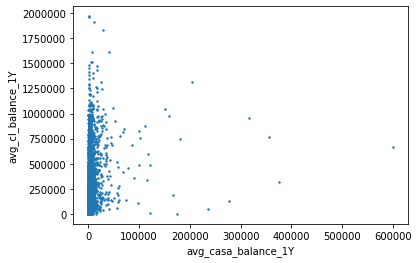

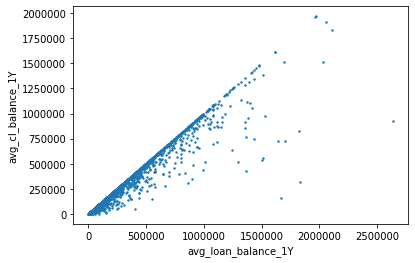

In [64]:
drawed_plt=[]
for col1 in df1.columns:
    for col2 in df1.columns:
        if col2==col1 or (col1,col2) in drawed_plt:
            continue
        drawed_plt.append((col2,col1))
        plt.scatter(df1[col1],df1[col2],s=2)
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

### 2.2.2.2. Немного поразмышляем об увиденном. Вполне логично выглядит бОльшая чать данных - у клиентов небольшие остатки по расчетным счетам при разном размере долговой нагрузки. Вызывают удивление два момента. Первый - есть клиенты с расчетным счетом, превышающим потребительский кредит. Это не очень рационально, но может быть дело в беспроцентном периоде. Второе - на графике avg_loan_balance_1Y/avg_cl_balance_1Y есть много точек, в которых эти данные не равны, однако ипотеки тут нет. Есть точка с разницей в 1.5e+6. Может быть это автокредиты ?

### 2.2.2.3. Посмотрим на аномалии

In [65]:
mu=[]
sigma=[]
for col in df1.columns:
    mu.append(df1[col].mean())
    sigma.append(df1[col].std())

In [66]:
mu,sigma

([5039.521838671731, 299642.0565150613, 282165.9197517958],
 [19450.476175985703, 294994.66384747496, 270462.3767278054])

In [67]:
df1['eps']=prob(df1.avg_casa_balance_1Y,mu[0],sigma[0])*prob(df1.avg_loan_balance_1Y,mu[1],sigma[1])*prob(df1.avg_cl_balance_1Y,mu[2],sigma[2])

In [68]:
df1.eps.describe()

count     3.458000e+03
mean      5.959619e-01
std       2.887726e-01
min      1.075752e-204
25%       4.309731e-01
50%       6.180191e-01
75%       8.526164e-01
max       9.989265e-01
Name: eps, dtype: float64

In [69]:
df1.loc[df1.eps<0.01].shape

(206, 4)

### 2.2.2.4. Уберем аномалии и поразбиваем на кластера. Данные у нас трехмерные, может быть мы не видим какие-то группы.

In [70]:
df1=df1.loc[df1.eps>0.01]
df1=df1.drop('eps',axis=1)
df1

,avg_casa_balance_1Y,avg_loan_balance_1Y,avg_cl_balance_1Y
16,8001.347500,193872.628330,193872.62833
27,125.933333,328040.611670,328040.61167
47,458.172500,157418.477500,157418.47750
55,254.402500,104340.927500,104340.92750
56,302.008333,357000.795000,357000.79500
...,...,...,...
49870,542.565833,784280.435000,784280.43500
49880,1761.357500,196380.799170,196380.79917
49895,2977.755000,91655.827500,91655.82750
49915,175.445833,28383.309167,23802.72250


### 2.2.2.5. Сначала попробуем без нормализации

In [71]:
loss=[]
for k in range(1,50):
    kmeans=KMeans(n_clusters=k,random_state=42,n_jobs=-1).fit(df1)
    loss.append(kmeans.inertia_)

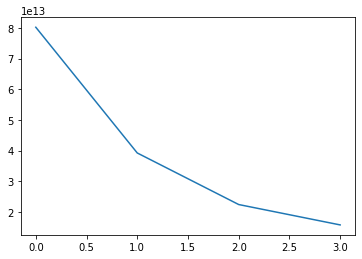

In [72]:
plt.plot(loss[1:5])
plt.show()

### 2.2.2.6. По правилу локтя надо разбить на две группы

In [73]:
kmeans=KMeans(n_clusters=2,random_state=42,n_jobs=-1).fit(df1)

In [74]:
centroids=kmeans.cluster_centers_
centroids

array([[  2890.74483065, 142944.04853009, 136305.69370682],
       [  4977.17952727, 550161.86904906, 524845.08070784]])

### 2.2.2.7. Судя по центроидам получились группы, с двумя уровнями долговой нагрузки. Посмотрим размеры этих групп

In [75]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [76]:
unique,counts

(array([0, 1]), array([2390,  862], dtype=int64))

### 2.2.2.8. 75/25 - близко к Паретто. Попробуем выловить закономерность между странным явлением несовпадения данных (пункт 2.2.2.2.) и размером счета

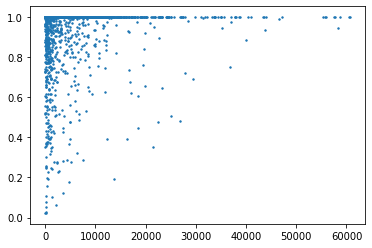

In [77]:
plt.scatter(df1.avg_casa_balance_1Y,df1.avg_cl_balance_1Y/df1.avg_loan_balance_1Y,s=2)
plt.show()

### 2.2.2.9. Можно сказать, что они ортогональны

### 2.2.2.10. Теперь нормализуем данные и посмотрим на кластеризацию

In [78]:
scaler = StandardScaler()
scaled_data=scaler.fit_transform(df1)
loss=[]
for k in range(1,50):
    kmeans=KMeans(n_clusters=k,random_state=42,n_jobs=-1).fit(scaled_data)
    loss.append(kmeans.inertia_)

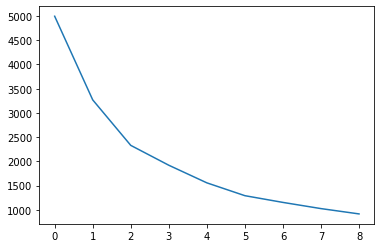

In [79]:
plt.plot(loss[1:10])
plt.show()

### 2.2.2.11. Здесь разделение на три группы более ярко выражено

In [80]:
kmeans=KMeans(n_clusters=3,random_state=42,n_jobs=-1).fit(scaled_data)

In [81]:
centroids=kmeans.cluster_centers_
scaler.inverse_transform(centroids)

array([[  2122.60281756, 141576.80151102, 134847.06621407],
       [  3493.79801375, 546267.27117762, 522724.69179582],
       [ 28865.77996068, 363906.41584118, 339221.52306091]])

In [82]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
unique,counts

(array([0, 1, 2]), array([2319,  814,  119], dtype=int64))

### 2.2.2.12. Вот явно выраженный положительный эффект от нормализации - выделена группа клиентов (третья), в которой остатки по счетам в 10 раз больше, чем у остальных, а уровень долговой нагрузки - средний. Замечательно, как мне кажется :). Я разбивал данные без нормализации на три группы, но эту группу не получил.

### 2.2.3. Еще мне хотелось посмотреть на людей, у которых проходят большие транзакции по картам. Выберем датафрейм с характеристиками ml_balance=0 avg_td_balance_1Y>0 avg_cl_balance_1Y=0 avg_loan_balance_1Y=0 dc_trx_sum>0 avg_casa_balance_1Y>0 . Он содержит клиентов без долговой нагрузки, пользующихся всеми остальными продуктами - депозит, счета и карты 

In [83]:
df1=all_df[3]
df1

,dc_trx_sum,avg_casa_balance_1Y,avg_td_balance_1Y
29,9.922944e+04,1.270331e+04,1.269583e+06
242,1.884000e+04,6.639694e+03,8.737500e+05
385,4.929067e+05,2.921175e+05,2.291667e+05
416,1.016683e+05,6.403842e+04,1.601513e+05
427,4.530000e+04,8.647451e+03,9.666667e+05
...,...,...,...
49882,1.741139e+06,1.562611e+05,5.711306e+03
49914,6.158742e+05,1.662268e+07,5.000000e+05
49924,1.529067e+05,1.033688e+06,3.200000e+06
49942,1.000000e+05,9.166790e+05,1.500000e+06


### 2.2.3.1. Построим попарные графики

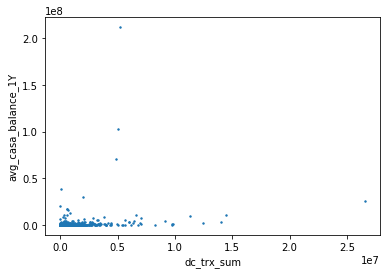

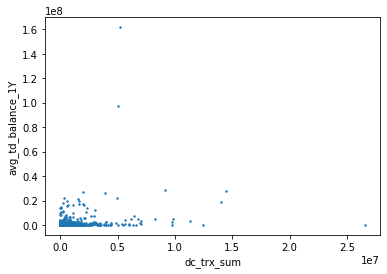

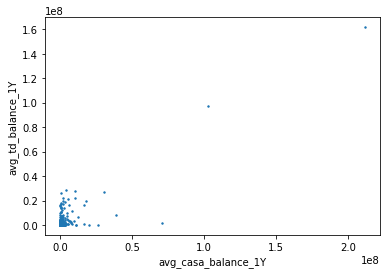

In [84]:
drawed_plt=[]
for col1 in df1.columns:
    for col2 in df1.columns:
        if col2==col1 or (col1,col2) in drawed_plt:
            continue
        drawed_plt.append((col2,col1))
        plt.scatter(df1[col1],df1[col2],s=2)
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

### 2.2.3.2. Аномалии мы разобрали в пункте 1.3.7. Поэтому выкинем их из рассмотрения

In [85]:
mu=[]
sigma=[]
for col in df1.columns:
    mu.append(df1[col].mean())
    sigma.append(df1[col].std())

In [86]:
df1['eps']=prob(df1.dc_trx_sum,mu[0],sigma[0])*prob(df1.avg_casa_balance_1Y,mu[1],sigma[1])*prob(df1.avg_td_balance_1Y,mu[2],sigma[2])

In [87]:
df1.eps.describe()

count    1384.000000
mean        0.853610
std         0.220975
min         0.000000
25%         0.879113
50%         0.910273
75%         0.958403
max         0.996147
Name: eps, dtype: float64

In [88]:
df1.shape[0],df1.loc[df1.eps<0.01].shape[0]

(1384, 36)

### 2.2.3.3. Аномальных менее 3%. Чудесно :). Посмотрим еще раз на графики, предварительно убрав eps

In [89]:
df1=df1.loc[df1.eps>0.01]
df1=df1.drop('eps',axis=1)

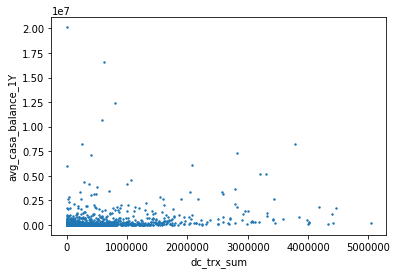

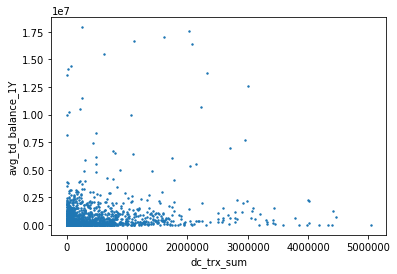

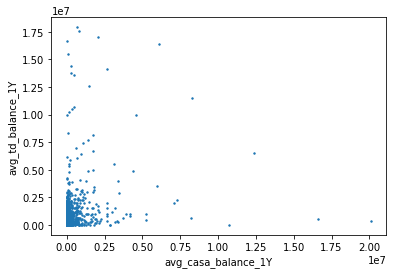

In [90]:
drawed_plt=[]
for col1 in df1.columns:
    for col2 in df1.columns:
        if col2==col1 or (col1,col2) in drawed_plt:
            continue
        drawed_plt.append((col2,col1))
        plt.scatter(df1[col1],df1[col2],s=2)
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

### 2.2.3.4. Ничего интересного пока не видно. Попробуем кластеризовать, предварительно нормализовав данные

In [91]:
scaler = StandardScaler()
scaled_data=scaler.fit_transform(df1)
loss=[]
for k in range(1,50):
    kmeans=KMeans(n_clusters=k,random_state=42,n_jobs=-1).fit(scaled_data)
    loss.append(kmeans.inertia_)

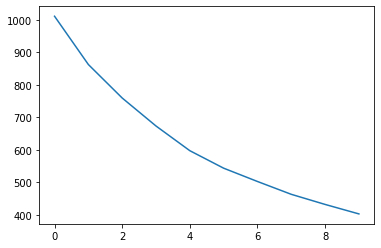

In [92]:
plt.plot(loss[5:15])
plt.show()

### 2.2.3.5. Очень похоже на 9 групп

In [93]:
kmeans=KMeans(n_clusters=9,random_state=42,n_jobs=-1).fit(scaled_data)

In [94]:
centroids=kmeans.cluster_centers_
scaler.inverse_transform(centroids)

array([[  129916.61202742,    75293.42704342,   346688.56846941],
       [ 1502830.2518881 ,   357384.86106917,   703764.52984881],
       [ 1111040.72045154,  2139167.63869808, 14700277.34023077],
       [  501616.4820075 , 14957900.56325   ,  1844275.0625    ],
       [ 3354155.76040811,   662180.2413537 ,   675666.24874694],
       [ 1574670.69574455,  4236740.89279545,  1405212.92255515],
       [  231103.85751172,   403218.01193044,  2003298.72390155],
       [  669632.89418344,   180349.17629819,   353182.34969928],
       [ 1078075.02277421,   840910.17534196,  7246364.09484737]])

In [95]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
unique,counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([627, 127,  13,   4,  37,  22, 173, 326,  19], dtype=int64))

In [96]:
df1.columns

Index(['dc_trx_sum', 'avg_casa_balance_1Y', 'avg_td_balance_1Y'], dtype='object')

### 2.2.3.6. Половина людей попали в первый кластер - с самыми маленькими суммами

## 3. Резюме
### Это третья версия кластеризации. Здесь для разбиения на группы я применил исключительно математику. Однако этот вариант мне нравится больше всего, потому что разбиение очень понятное. В задании не было указано целей, для которых делается это разбиение - для маркетинга, для выявления ВИП-клиентов, для безопасности или чего-то еще. Для каждой из перечисленных мною целей моя кластеризация может являться отправной точкой, неким базисом.
### У меня осталась одна нереализованная гипотеза, на которую потребуется много времени - в процессе работы я был загнан в рамки большим количеством нулей. Можно попробовать спрогнозировать, какие числа могли бы стоять вместо них, если эти данные были бы (например поле income) или клиент пользовался этим продуктом.
### Данные по кластеризации представлены в виде дерева в определениях задания. Привожу их еще раз

In [97]:
for i in range(len(all_df)):
    print(all_df[i].shape,all_df_describe[i])

(574, 6) ml_balance>0 
(184, 5) ml_balance=0 avg_td_balance_1Y>0 avg_cl_balance_1Y>0 
(145, 4) ml_balance=0 avg_td_balance_1Y>0 avg_cl_balance_1Y=0 avg_loan_balance_1Y>0 
(1384, 4) ml_balance=0 avg_td_balance_1Y>0 avg_cl_balance_1Y=0 avg_loan_balance_1Y=0 dc_trx_sum>0 avg_casa_balance_1Y>0 
(14, 2) ml_balance=0 avg_td_balance_1Y>0 avg_cl_balance_1Y=0 avg_loan_balance_1Y=0 dc_trx_sum>0 avg_casa_balance_1Y=0 
(1479, 2) ml_balance=0 avg_td_balance_1Y>0 avg_cl_balance_1Y=0 avg_loan_balance_1Y=0 dc_trx_sum=0 avg_casa_balance_1Y>0 
(598, 1) ml_balance=0 avg_td_balance_1Y>0 avg_cl_balance_1Y=0 avg_loan_balance_1Y=0 dc_trx_sum=0 avg_casa_balance_1Y=0 
(5724, 4) ml_balance=0 avg_td_balance_1Y=0 avg_cl_balance_1Y>0 dc_trx_sum>0 avg_casa_balance_1Y>0 
(25, 3) ml_balance=0 avg_td_balance_1Y=0 avg_cl_balance_1Y>0 dc_trx_sum>0 avg_casa_balance_1Y=0 
(3458, 4) ml_balance=0 avg_td_balance_1Y=0 avg_cl_balance_1Y>0 dc_trx_sum=0 avg_casa_balance_1Y>0 
(67, 2) ml_balance=0 avg_td_balance_1Y=0 avg_cl_balan